# Understanding the data

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import missingno as miss_no

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, learning_curve, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, precision_score, recall_score, f1_score, log_loss
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read and describe the data set

df=pd.read_csv('Kaggle_Salary.csv',header=1)
df.head()

Duration (in seconds) What is your age (# years)?  \
0                    510                       22-24   
1                    423                       40-44   
2                    391                       40-44   
3                    392                       22-24   
4                    470                       50-54   

  What is your gender? - Selected Choice  \
0                                   Male   
1                                   Male   
2                                   Male   
3                                   Male   
4                                   Male   

   What is your gender? - Prefer to self-describe - Text  \
0                                                 -1       
1                                                 -1       
2                                                 -1       
3                                                 -1       
4                                                 -1       

  In which country do you currently reside?  \
0                                    France   
1                                     India   
2                                 Australia   
3                                     India   
4                                    France   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                    Master’s degree                                                                
1                                Professional degree                                                                
2                                    Master’s degree                                                                
3                                  Bachelor’s degree                                                                
4                                    Master’s degree                                                                

  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                  Software Engineer                                                        
1                                  Software Engineer                                                        
2                                              Other                                                        
3                                              Other                                                        
4                                     Data Scientist                                                        

   Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
0                                                 -1                                                      
1                                                 -1                                                      
2                                                  0                                                      
3                                                  1                                                      
4                                                 -1                                                      

  What is the size of the company where you are employed?  \
0                               1000-9,999 employees        
1                                 > 10,000 employees        
2                                 > 10,000 employees        
3                                     0-49 employees        
4                                     0-49 employees        

  Approximately how many individuals are responsible for data science workloads at your place of business?  \
0                                                  0                                                         
1                                                20+                                                         
2                                                20+       

In [3]:
df.describe()

Duration (in seconds)  \
count           12497.000000   
mean            14186.510202   
std             72866.379285   
min                67.000000   
25%               448.000000   
50%               636.000000   
75%              1054.000000   
max            843612.000000   

       What is your gender? - Prefer to self-describe - Text  \
count                                       12497.000000       
mean                                           -0.963191       
std                                             0.978525       
min                                            -1.000000       
25%                                            -1.000000       
50%                                            -1.000000       
75%                                            -1.000000       
max                                            39.000000       

       Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
count                                       12497.000000                                                      
mean                                           29.216932                                                      
std                                           122.208237                                                      
min                                            -1.000000                                                      
25%                                            -1.000000                                                      
50%                                            -1.000000                                                      
75%                                            -1.000000                                                      
max                                           877.000000                                                      

       Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text  \
count                                       12497.000000                                                                   
mean                                           -0.250940                                                                   
std                                             8.257127                                                                   
min                                            -1.000000                                                                   
25%                                            -1.000000                                                                   
50%                                            -1.000000                                                                   
75%                                            -1.000000                                                                   
max                                           137.000000                                                                   

       Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text  \
count                                       12497.000000                                                                     
mean                                            8.103465                                                                     
std                                            51.449272                                                                     
min                                            -1.000000                                                                     
25%                                            -1.000000                                                                     
50%                                            -1.000000                                                                     
75%                                            -1.000000                                                                     
max             

In [4]:
# Initial exploration of raw data

para = df.shape
print("Number of responses =",para[0],"\n" + "Number of features =",para[1])

Number of responses = 12497 
Number of features = 248


### Visualizing missing data using sns.heatmap

Text(0.5, 1, 'Missing data visualization')

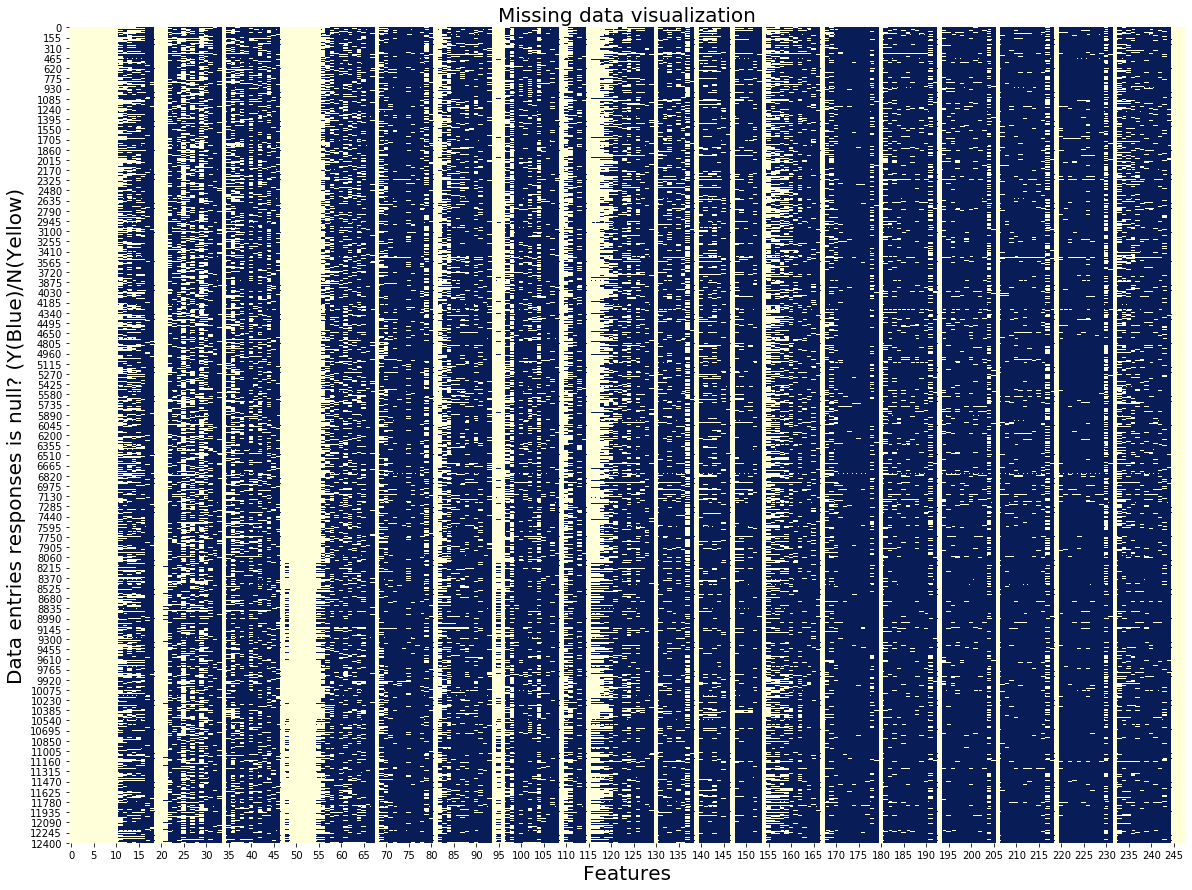

In [5]:
column_name = df.columns
dict = {column_name[i] : i for i in range(0, len(column_name) )}
df = df.rename(columns=dict)

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df.isnull(), cmap="YlGnBu", xticklabels = 5,  cbar=False)

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data entries responses is null? (Y(Blue)/N(Yellow)', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

#### It is visible in the heat map that many of the features have missing data which is making sense as well. As most of the features are the encoded form of the responses for the multiple choice questions.

### Visualizing missing data using msno.matrix

Text(0.5, 1.0, 'Missing data visualization')

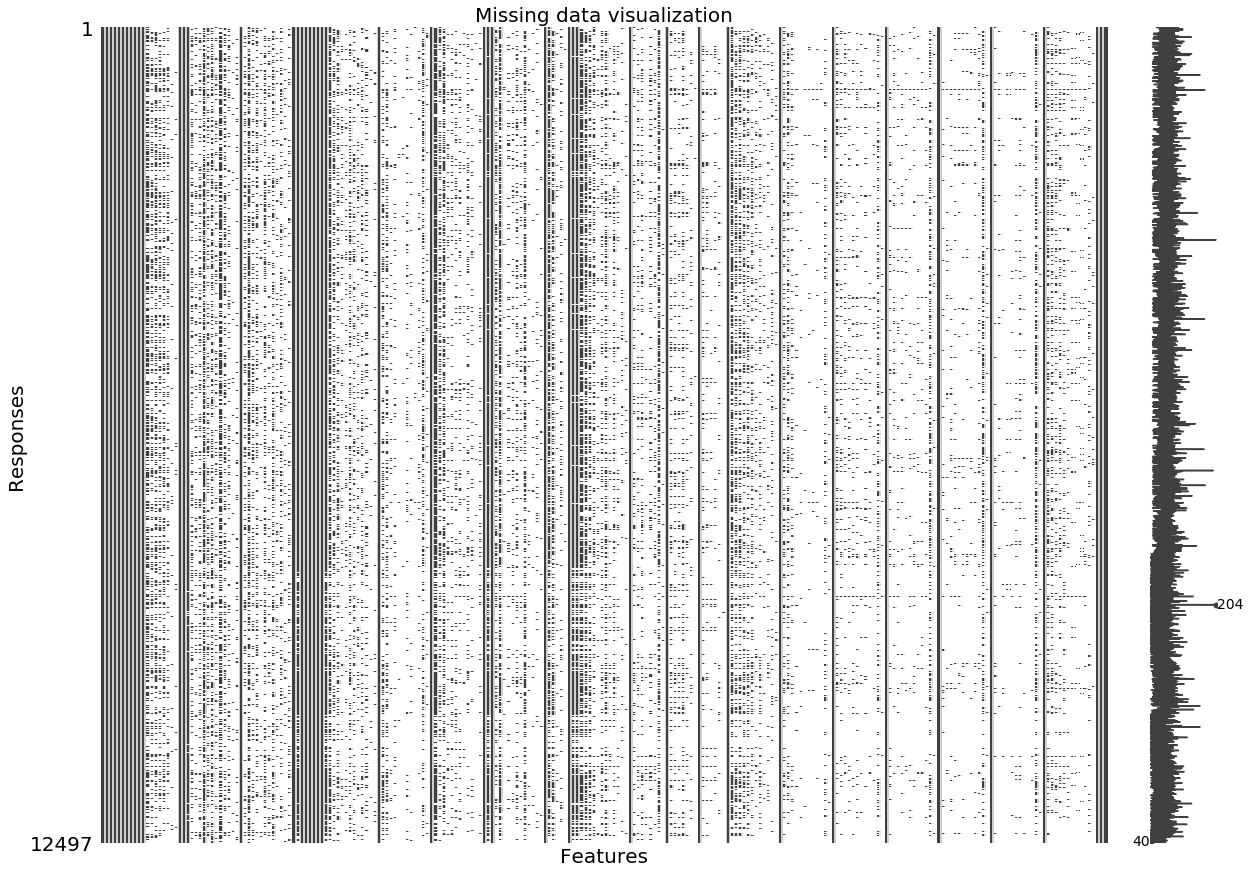

In [6]:
ax = miss_no.matrix(df,figsize=(20,15))

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Responses', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

#### The msno.matrix nullity matrix is a data-dense display which lets us visually pick out patterns in data. The broken lines represents the missing values. The wavy verticle line on the right display the row wise count of the missing values.

In [7]:
# checking missing values in each feature

df=pd.read_csv('Kaggle_Salary.csv')
missing_value_count = df.isna().sum().sort_values(ascending=False)
print(missing_value_count)

Q33_Part_9                             12469
Q26_Part_7                             12456
Q27_Part_6                             12451
Q17_Part_9                             12437
Q18_Part_11                            12428
                                       ...  
Q21_OTHER_TEXT                             0
Q24_OTHER_TEXT                             0
Q25_OTHER_TEXT                             0
Q26_OTHER_TEXT                             0
Time from Start to Finish (seconds)        0
Length: 248, dtype: int64


#### As we can see that the count of missing values is too high for some of the features, but still it will not be feasible to drop them completely as they are the answers to multiple choice questions. These features do not have independent affect on the data, instead they are dependent on the question asked.

# Q1 Data Cleaning

In [8]:
# reading the data set 

clean_data=pd.read_csv('Kaggle_Salary.csv')
clean_data=clean_data.drop(0,axis=0)
clean_data.head()

Time from Start to Finish (seconds)     Q1    Q2 Q2_OTHER_TEXT         Q3  \
1                                 510  22-24  Male            -1     France   
2                                 423  40-44  Male            -1      India   
3                                 391  40-44  Male            -1  Australia   
4                                 392  22-24  Male            -1      India   
5                                 470  50-54  Male            -1     France   

                    Q4                 Q5 Q5_OTHER_TEXT                    Q6  \
1      Master’s degree  Software Engineer            -1  1000-9,999 employees   
2  Professional degree  Software Engineer            -1    > 10,000 employees   
3      Master’s degree              Other             0    > 10,000 employees   
4    Bachelor’s degree              Other             1        0-49 employees   
5      Master’s degree     Data Scientist            -1        0-49 employees   

    Q7  ... Q34_Part_6                       Q34_Part_7 Q34_Part_8  \
1    0  ...        NaN                              NaN        NaN   
2  20+  ...        NaN                              NaN        NaN   
3  20+  ...        NaN                              NaN        NaN   
4    0  ...        NaN                              NaN        NaN   
5  3-4  ...        NaN  AWS Relational Database Service        NaN   

           Q34_Part_9 Q34_Part_10 Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT  \
1                 NaN         NaN         NaN         NaN             -1   
2                 NaN         NaN         NaN         NaN             -1   
3  Azure SQL Database         NaN         NaN         NaN             -1   
4                 NaN         NaN         NaN         NaN             -1   
5                 NaN         NaN         NaN         NaN             -1   

  Q10_Encoded    Q10_buckets  
1         3.0  30,000-39,999  
2         0.0        0-9,999  
3        14.0       >250,000  
4         0.0        0-9,999  
5         6.0  60,000-69,999  

[5 rows x 248 columns]

#### Feature 1 'Time from Start to Finish (seconds)' can be dropped as time for giving the response will not be having any impact on salary distribution 

In [9]:
clean_data = clean_data.drop('Time from Start to Finish (seconds)',axis=1)
print(clean_data.shape)

(12497, 247)


#### Understanding the columns with "other text"

In [10]:
print('unique values in Q2'+"\n")
print(*clean_data['Q2'].unique(),sep = "\n")
print("\n"+'Number of unique values in Q2. = ' + str(len(clean_data['Q2'].unique())))

unique values in Q2

Male
Female
Prefer to self-describe
Prefer not to say

Number of unique values in Q2. = 4


In [11]:
print('unique values in Q2_OTHER_TEXT'+"\n")
print(*clean_data['Q2_OTHER_TEXT'].unique(),sep = ", ")
print("\n"+'Number of unique values in Q2_OTHER_TEXT. = ' + str(len(clean_data['Q2_OTHER_TEXT'].unique())))

unique values in Q2_OTHER_TEXT

-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, -1, 9, 11, 13, 14, 15, 16, 18, 22, 27, 30, 31, 33, 34, 35, 37, 39

Number of unique values in Q2_OTHER_TEXT. = 27


#### From this it can be inferred that the columns with the keyword "Other text" will have negligible significance on the scope of our analysis so we can drop all such columns

In [12]:
other_text_list = [col for col in clean_data.columns if 'OTHER_TEXT' in col]
clean_data = clean_data.drop(other_text_list, axis = 1)
print(clean_data.shape)

(12497, 224)


#### Q12 : Who/what are your favorite media sources that report on data science topics?  
#### and Q19 :  What programming language would you recommend an aspiring data scientist to learn first? 
#### will not make any contributon to salary distribution, so we can remove them.

In [13]:
# Removing Question 12

other_text_list = [col for col in clean_data.columns if 'Q12' in col]
clean_data = clean_data.drop(other_text_list, axis = 1)
print(clean_data.shape)

(12497, 212)


In [14]:
# Removing Question 19

other_text_list = [col for col in clean_data.columns if 'Q19' in col]
clean_data = clean_data.drop(other_text_list, axis = 1)
print(clean_data.shape)

(12497, 211)


### Studying the missing values

In [15]:
# counting the missing values and their percentages for each feature

for miss in clean_data:
    i = clean_data[miss].isna().sum()
    if i!=0:
        print("Missing values in ", miss,": ",i)
        print ("The percentage of missing values is: ", clean_data[miss].isnull().sum()*100/len(clean_data[miss]),"\n" )

Missing values in  Q9_Part_1 :  6518
The percentage of missing values is:  52.15651756421541 

Missing values in  Q9_Part_2 :  8990
The percentage of missing values is:  71.93726494358646 

Missing values in  Q9_Part_3 :  7607
The percentage of missing values is:  60.87060894614707 

Missing values in  Q9_Part_4 :  9212
The percentage of missing values is:  73.71369128590862 

Missing values in  Q9_Part_5 :  8863
The percentage of missing values is:  70.92102104505081 

Missing values in  Q9_Part_6 :  10194
The percentage of missing values is:  81.57157717852284 

Missing values in  Q9_Part_7 :  11982
The percentage of missing values is:  95.87901096263103 

Missing values in  Q9_Part_8 :  12258
The percentage of missing values is:  98.08754100984237 

Missing values in  Q11 :  247
The percentage of missing values is:  1.9764743538449228 

Missing values in  Q13_Part_1 :  10219
The percentage of missing values is:  81.77162519004561 

Missing values in  Q13_Part_2 :  6010
The percentag

The percentage of missing values is:  96.8392414179403 

Missing values in  Q30_Part_11 :  9342
The percentage of missing values is:  74.753940945827 

Missing values in  Q30_Part_12 :  12258
The percentage of missing values is:  98.08754100984237 

Missing values in  Q31_Part_1 :  11539
The percentage of missing values is:  92.33416019844763 

Missing values in  Q31_Part_2 :  11935
The percentage of missing values is:  95.50292070096823 

Missing values in  Q31_Part_3 :  11893
The percentage of missing values is:  95.16684004160999 

Missing values in  Q31_Part_4 :  12068
The percentage of missing values is:  96.56717612226934 

Missing values in  Q31_Part_5 :  12175
The percentage of missing values is:  97.42338161158678 

Missing values in  Q31_Part_6 :  12071
The percentage of missing values is:  96.59118188365207 

Missing values in  Q31_Part_7 :  11972
The percentage of missing values is:  95.79899175802193 

Missing values in  Q31_Part_8 :  12128
The percentage of missing values

In [16]:
# Selecting features which are already one hot encoded and renaming them

my_list = [col for col in clean_data.columns if 'Part' in col and 'Q14' not in col]
my_list

['Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q17_Part_1',
 'Q17_Part_2',
 'Q17_Part_3',
 'Q17_Part_4',
 'Q17_Part_5',
 'Q17_Part_6',
 'Q17_Part_7',
 'Q17_Part_8',
 'Q17_Part_9',
 'Q17_Part_10',
 'Q17_Part_11',
 'Q17_Part_12',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_Part_7',
 'Q18_Part_8',
 'Q18_Part_9',
 'Q18_Part_10',
 'Q18_Part_11',
 'Q18_Part_12',
 'Q20_Part_1',
 'Q20_Part_2',
 'Q20_Part_3',
 'Q20_Part_4',
 'Q20_Part_5',
 'Q20_Part_6',
 'Q20_Part_7',
 'Q20_Part_8',
 'Q20_Part_9',
 'Q20_Part_10',
 'Q20

In [17]:
for i in my_list:
    pos = i.find('_')
    clean_data = clean_data.rename(columns={i:i[:pos + 1] + clean_data[i].value_counts().index[0]})
clean_data.head()

Q1    Q2         Q3                   Q4                 Q5  \
1  22-24  Male     France      Master’s degree  Software Engineer   
2  40-44  Male      India  Professional degree  Software Engineer   
3  40-44  Male  Australia      Master’s degree              Other   
4  22-24  Male      India    Bachelor’s degree              Other   
5  50-54  Male     France      Master’s degree     Data Scientist   

                     Q6   Q7  \
1  1000-9,999 employees    0   
2    > 10,000 employees  20+   
3    > 10,000 employees  20+   
4        0-49 employees    0   
5        0-49 employees  3-4   

                                                  Q8  \
1                                      I do not know   
2  We have well established ML methods (i.e., mod...   
3                                      I do not know   
4                      No (we do not use ML methods)   
5  We have well established ML methods (i.e., mod...   

  Q9_Analyze and understand data to influence product or business decisions  \
1                                                NaN                          
2  Analyze and understand data to influence produ...                          
3                                                NaN                          
4                                                NaN                          
5                                                NaN                          

  Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data  \
1                                                NaN                                                                    
2  Build and/or run the data infrastructure that ...                                                                    
3                                                NaN                                                                    
4                                                NaN                                                                    
5                                                NaN                                                                    

   ... Q34_Oracle Database Q34_Microsoft Access  \
1  ...                 NaN                  NaN   
2  ...                 NaN                  NaN   
3  ...                 NaN                  NaN   
4  ...                 NaN                  NaN   
5  ...                 NaN                  NaN   

  Q34_AWS Relational Database Service Q34_AWS DynamoDB Q34_Azure SQL Database  \
1                                 NaN              NaN                    NaN   
2                                 NaN              NaN                    NaN   
3                                 NaN              NaN     Azure SQL Database   
4                                 NaN              NaN                    NaN   
5     AWS Relational Database Service              NaN                    NaN   

  Q34_Google Cloud SQL Q34_None Q34_Other Q10_Encoded    Q10_buckets  
1                  NaN      NaN       NaN         3.0  30,000-39,999  
2                  NaN      NaN       NaN         0.0        0-9,999  
3                  NaN      NaN       NaN        14.0       >250,000  
4                  NaN      NaN       NaN         0.0        0-9,999  
5                  NaN      NaN       NaN         6.0  60,000-69,999  

[5 rows x 211 columns]

## Handling Each Question Separately

## Handling Q1 : What is your age (# years)?

In [18]:
# Looking at the unique values to know about the data in the feature

clean_data['Q1'].unique()

array(['22-24', '40-44', '50-54', '55-59', '30-34', '18-21', '35-39',
       '25-29', '45-49', '60-69', '70+'], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [19]:
clean_data['Q1'] = clean_data['Q1'].map({'18-21':0,
                                         '22-24':1,
                                         '25-29':2,
                                         '30-34':3,
                                         '35-39':4,
                                         '40-44':5,
                                         '45-49':6,
                                         '50-54':7,
                                         '55-59':8,
                                         '60-69':9,
                                         '70+':10})
clean_data['Q1'] = clean_data['Q1'].astype(int)

## Handling Q2 : What is your gender?

In [20]:
# Looking at the unique values to about the data in the feature

clean_data['Q2'].unique()

array(['Male', 'Female', 'Prefer to self-describe', 'Prefer not to say'],
      dtype=object)

#### As we can see this is categorical data, so we are one hot encoding it

In [21]:
enc = OneHotEncoder(handle_unknown='error')
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Q2']]).toarray())
enc_df.index = enc_df.index + 1
enc_df

0    1    2    3
1      0.0  1.0  0.0  0.0
2      0.0  1.0  0.0  0.0
3      0.0  1.0  0.0  0.0
4      0.0  1.0  0.0  0.0
5      0.0  1.0  0.0  0.0
...    ...  ...  ...  ...
12493  0.0  1.0  0.0  0.0
12494  0.0  0.0  1.0  0.0
12495  0.0  1.0  0.0  0.0
12496  0.0  1.0  0.0  0.0
12497  0.0  1.0  0.0  0.0

[12497 rows x 4 columns]

#### Changing the column names

In [22]:
column_name=enc.get_feature_names(['Q2'])
column_name

array(['Q2_Female', 'Q2_Male', 'Q2_Prefer not to say',
       'Q2_Prefer to self-describe'], dtype=object)

In [23]:
dict = { i : column_name[i] for i in range(0, len(column_name) ) }
dict

{0: 'Q2_Female',
 1: 'Q2_Male',
 2: 'Q2_Prefer not to say',
 3: 'Q2_Prefer to self-describe'}

In [24]:
enc_df = enc_df.rename(columns=dict)
enc_df

Q2_Female  Q2_Male  Q2_Prefer not to say  Q2_Prefer to self-describe
1            0.0      1.0                   0.0                         0.0
2            0.0      1.0                   0.0                         0.0
3            0.0      1.0                   0.0                         0.0
4            0.0      1.0                   0.0                         0.0
5            0.0      1.0                   0.0                         0.0
...          ...      ...                   ...                         ...
12493        0.0      1.0                   0.0                         0.0
12494        0.0      0.0                   1.0                         0.0
12495        0.0      1.0                   0.0                         0.0
12496        0.0      1.0                   0.0                         0.0
12497        0.0      1.0                   0.0                         0.0

[12497 rows x 4 columns]

#### Merging to the data set

In [25]:
clean_data = pd.concat([clean_data, enc_df], axis=1)
print(clean_data.shape)

(12497, 215)


In [26]:
# dropping the parent feature

clean_data=clean_data.drop('Q2',axis=1)

## Handling Q3 : In which country do you currently reside?

In [27]:
# Looking at the unique values to about the data in the feature

clean_data['Q3'].unique()

array(['France', 'India', 'Australia', 'United States of America',
       'Netherlands', 'Germany', 'Ireland', 'Russia', 'Greece', 'Ukraine',
       'Pakistan', 'Japan', 'Other', 'Brazil', 'South Korea', 'Belarus',
       'Nigeria', 'United Kingdom of Great Britain and Northern Ireland',
       'Sweden', 'Mexico', 'Canada', 'Portugal', 'Poland', 'Indonesia',
       'Italy', 'Czech Republic', 'Spain', 'Chile', 'Hong Kong (S.A.R.)',
       'South Africa', 'Argentina', 'Turkey', 'Israel', 'Taiwan', 'Egypt',
       'Morocco', 'Hungary', 'Colombia', 'Norway', 'Thailand',
       'Switzerland', 'Viet Nam', 'Singapore', 'Bangladesh',
       'Iran, Islamic Republic of...', 'Peru', 'Kenya', 'Romania',
       'China', 'Belgium', 'Austria', 'Algeria', 'New Zealand', 'Tunisia',
       'Philippines', 'Malaysia', 'Republic of Korea', 'Denmark',
       'Saudi Arabia'], dtype=object)

#### As we can see this is categorical data, so we are one hot encoding it

In [28]:
enc = OneHotEncoder(handle_unknown='error')
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Q3']]).toarray())
enc_df.index = enc_df.index + 1
enc_df

0    1    2    3    4    5    6    7    8    9   ...   49   50   51  \
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12494  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        52   53   54   55   56   57   58  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
12493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[12497 rows x 59 columns]

#### Changing the column names

In [29]:
column_name=enc.get_feature_names(['Q3'])
column_name

array(['Q3_Algeria', 'Q3_Argentina', 'Q3_Australia', 'Q3_Austria',
       'Q3_Bangladesh', 'Q3_Belarus', 'Q3_Belgium', 'Q3_Brazil',
       'Q3_Canada', 'Q3_Chile', 'Q3_China', 'Q3_Colombia',
       'Q3_Czech Republic', 'Q3_Denmark', 'Q3_Egypt', 'Q3_France',
       'Q3_Germany', 'Q3_Greece', 'Q3_Hong Kong (S.A.R.)', 'Q3_Hungary',
       'Q3_India', 'Q3_Indonesia', 'Q3_Iran, Islamic Republic of...',
       'Q3_Ireland', 'Q3_Israel', 'Q3_Italy', 'Q3_Japan', 'Q3_Kenya',
       'Q3_Malaysia', 'Q3_Mexico', 'Q3_Morocco', 'Q3_Netherlands',
       'Q3_New Zealand', 'Q3_Nigeria', 'Q3_Norway', 'Q3_Other',
       'Q3_Pakistan', 'Q3_Peru', 'Q3_Philippines', 'Q3_Poland',
       'Q3_Portugal', 'Q3_Republic of Korea', 'Q3_Romania', 'Q3_Russia',
       'Q3_Saudi Arabia', 'Q3_Singapore', 'Q3_South Africa',
       'Q3_South Korea', 'Q3_Spain', 'Q3_Sweden', 'Q3_Switzerland',
       'Q3_Taiwan', 'Q3_Thailand', 'Q3_Tunisia', 'Q3_Turkey',
       'Q3_Ukraine',
       'Q3_United Kingdom of Great Britain and No

In [30]:
dict = { i : column_name[i] for i in range(0, len(column_name) ) }
dict

{0: 'Q3_Algeria',
 1: 'Q3_Argentina',
 2: 'Q3_Australia',
 3: 'Q3_Austria',
 4: 'Q3_Bangladesh',
 5: 'Q3_Belarus',
 6: 'Q3_Belgium',
 7: 'Q3_Brazil',
 8: 'Q3_Canada',
 9: 'Q3_Chile',
 10: 'Q3_China',
 11: 'Q3_Colombia',
 12: 'Q3_Czech Republic',
 13: 'Q3_Denmark',
 14: 'Q3_Egypt',
 15: 'Q3_France',
 16: 'Q3_Germany',
 17: 'Q3_Greece',
 18: 'Q3_Hong Kong (S.A.R.)',
 19: 'Q3_Hungary',
 20: 'Q3_India',
 21: 'Q3_Indonesia',
 22: 'Q3_Iran, Islamic Republic of...',
 23: 'Q3_Ireland',
 24: 'Q3_Israel',
 25: 'Q3_Italy',
 26: 'Q3_Japan',
 27: 'Q3_Kenya',
 28: 'Q3_Malaysia',
 29: 'Q3_Mexico',
 30: 'Q3_Morocco',
 31: 'Q3_Netherlands',
 32: 'Q3_New Zealand',
 33: 'Q3_Nigeria',
 34: 'Q3_Norway',
 35: 'Q3_Other',
 36: 'Q3_Pakistan',
 37: 'Q3_Peru',
 38: 'Q3_Philippines',
 39: 'Q3_Poland',
 40: 'Q3_Portugal',
 41: 'Q3_Republic of Korea',
 42: 'Q3_Romania',
 43: 'Q3_Russia',
 44: 'Q3_Saudi Arabia',
 45: 'Q3_Singapore',
 46: 'Q3_South Africa',
 47: 'Q3_South Korea',
 48: 'Q3_Spain',
 49: 'Q3_Sweden',
 

In [31]:
enc_df = enc_df.rename(columns=dict)
enc_df

Q3_Algeria  Q3_Argentina  Q3_Australia  Q3_Austria  Q3_Bangladesh  \
1             0.0           0.0           0.0         0.0            0.0   
2             0.0           0.0           0.0         0.0            0.0   
3             0.0           0.0           1.0         0.0            0.0   
4             0.0           0.0           0.0         0.0            0.0   
5             0.0           0.0           0.0         0.0            0.0   
...           ...           ...           ...         ...            ...   
12493         0.0           0.0           0.0         0.0            0.0   
12494         0.0           0.0           0.0         1.0            0.0   
12495         0.0           0.0           0.0         0.0            0.0   
12496         0.0           0.0           0.0         0.0            0.0   
12497         0.0           0.0           0.0         0.0            0.0   

       Q3_Belarus  Q3_Belgium  Q3_Brazil  Q3_Canada  Q3_Chile  ...  Q3_Sweden  \
1             0.0         0.0        0.0        0.0       0.0  ...        0.0   
2             0.0         0.0        0.0        0.0       0.0  ...        0.0   
3             0.0         0.0        0.0        0.0       0.0  ...        0.0   
4             0.0         0.0        0.0        0.0       0.0  ...        0.0   
5             0.0         0.0        0.0        0.0       0.0  ...        0.0   
...           ...         ...        ...        ...       ...  ...        ...   
12493         0.0         0.0        0.0        0.0       0.0  ...        0.0   
12494         0.0         0.0        0.0        0.0       0.0  ...        0.0   
12495         0.0         0.0        0.0        0.0       0.0  ...        0.0   
12496         0.0         0.0        0.0        0.0       0.0  ...        0.0   
12497         0.0         0.0        0.0        0.0       0.0  ...        0.0   

       Q3_Switzerland  Q3_Taiwan  Q3_Thailand  Q3_Tunisia  Q3_Turkey  \
1                 0.0        0.0          0.0         0.0        0.0   
2                 0.0        0.0          0.0         0.0        0.0   
3                 0.0        0.0          0.0         0.0        0.0   
4                 0.0        0.0          0.0         0.0        0.0   
5                 0.0        0.0          0.0         0.0        0.0   
...               ...        ...          ...         ...        ...   
12493             0.0        0.0          0.0         0.0        0.0   
12494             0.0        0.0          0.0         0.0        0.0   
12495             0.0        0.0          0.0         0.0        0.0   
12496             0.0        0.0          0.0         0.0        0.0   
12497             0.0        0.0          0.0         0.0        0.0   

       Q3_Ukraine  Q3_United Kingdom of Great Britain and Northern Ireland  \
1             0.0                                                0.0         
2             0.0                                                0.0         
3             0.0                                                0.0         
4             0.0                                                0.0         
5             0.0                                                0.0         
...           ...                                                ...         
12493         0.0                                                0.0         
12494         0.0                                                0.0         
12495         0.0                                                0.0         
12496         0.0                                                0.0         
12497         0.0                                                0.0         

       Q3_United States of America  Q3_Viet Nam  
1                              0.0          0.0  
2                              0.0          0.0  
3                              0.0          0.0  
4                              0.0          0.0  
5                              0.0          0.0  
...                

#### Merging to the data set

In [32]:
clean_data = pd.concat([clean_data, enc_df], axis=1)
print(clean_data.shape)

(12497, 273)


In [33]:
# dropping the parent feature

clean_data=clean_data.drop('Q3',axis=1)

## Handling Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [34]:
# Looking at the unique values to about the data in the feature

clean_data['Q4'].unique()

array(['Master’s degree', 'Professional degree', 'Bachelor’s degree',
       'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'I prefer not to answer', 'No formal education past high school'],
      dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [35]:
print ("The percentage of response \"I prefer not to answer\" is ", (clean_data['Q4']=='I prefer not to answer').sum()*100/len(clean_data['Q4']))

The percentage of response "I prefer not to answer" is  1.4723533648075537


Therefore we can impute it with mode

In [36]:
# looking at the counts before imputing

clean_data['Q4'].value_counts()

Master’s degree                                                      5868
Bachelor’s degree                                                    3361
Doctoral degree                                                      2083
Professional degree                                                   462
Some college/university study without earning a bachelor’s degree     414
I prefer not to answer                                                184
No formal education past high school                                  125
Name: Q4, dtype: int64

In [37]:
# imputting and looking at the counts after imputing

clean_data['Q4'] = clean_data['Q4'].replace('I prefer not to answer',clean_data['Q4'].value_counts().index[0])
clean_data['Q4'].value_counts()

Master’s degree                                                      6052
Bachelor’s degree                                                    3361
Doctoral degree                                                      2083
Professional degree                                                   462
Some college/university study without earning a bachelor’s degree     414
No formal education past high school                                  125
Name: Q4, dtype: int64

In [38]:
# label encoding

clean_data['Q4'] = clean_data['Q4'].map({'No formal education past high school':0,
                                         'Some college/university study without earning a bachelor’s degree':1,
                                         'Bachelor’s degree':2,
                                         'Professional degree':3,
                                         'Master’s degree':4,
                                         'Doctoral degree':5})
clean_data['Q4'] = clean_data['Q4'].astype(int)

## Handling Q5 : The title most similar to your current role (or most recent title if retired)

In [39]:
# Looking at the unique values to about the data in the feature

clean_data['Q5'].unique()

array(['Software Engineer', 'Other', 'Data Scientist', 'Statistician',
       'Product/Project Manager', 'Data Analyst', 'Research Scientist',
       'Business Analyst', 'Data Engineer', 'DBA/Database Engineer'],
      dtype=object)

#### As we can see this is categorical data, so we are one hot encoding it

In [40]:
enc = OneHotEncoder(handle_unknown='error')
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Q5']]).toarray())
enc_df.index = enc_df.index + 1
enc_df

0    1    2    3    4    5    6    7    8    9
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
12493  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
12494  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
12495  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
12496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
12497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[12497 rows x 10 columns]

#### Changing the column names

In [41]:
column_name=enc.get_feature_names(['Q3'])
column_name

array(['Q3_Business Analyst', 'Q3_DBA/Database Engineer',
       'Q3_Data Analyst', 'Q3_Data Engineer', 'Q3_Data Scientist',
       'Q3_Other', 'Q3_Product/Project Manager', 'Q3_Research Scientist',
       'Q3_Software Engineer', 'Q3_Statistician'], dtype=object)

In [42]:
dict = { i : column_name[i] for i in range(0, len(column_name) ) }
dict

{0: 'Q3_Business Analyst',
 1: 'Q3_DBA/Database Engineer',
 2: 'Q3_Data Analyst',
 3: 'Q3_Data Engineer',
 4: 'Q3_Data Scientist',
 5: 'Q3_Other',
 6: 'Q3_Product/Project Manager',
 7: 'Q3_Research Scientist',
 8: 'Q3_Software Engineer',
 9: 'Q3_Statistician'}

In [43]:
enc_df = enc_df.rename(columns=dict)
enc_df

Q3_Business Analyst  Q3_DBA/Database Engineer  Q3_Data Analyst  \
1                      0.0                       0.0              0.0   
2                      0.0                       0.0              0.0   
3                      0.0                       0.0              0.0   
4                      0.0                       0.0              0.0   
5                      0.0                       0.0              0.0   
...                    ...                       ...              ...   
12493                  0.0                       0.0              0.0   
12494                  0.0                       0.0              0.0   
12495                  0.0                       0.0              0.0   
12496                  0.0                       0.0              0.0   
12497                  0.0                       0.0              0.0   

       Q3_Data Engineer  Q3_Data Scientist  Q3_Other  \
1                   0.0                0.0       0.0   
2                   0.0                0.0       0.0   
3                   0.0                0.0       1.0   
4                   0.0                0.0       1.0   
5                   0.0                1.0       0.0   
...                 ...                ...       ...   
12493               0.0                1.0       0.0   
12494               0.0                1.0       0.0   
12495               0.0                0.0       1.0   
12496               0.0                0.0       0.0   
12497               0.0                0.0       0.0   

       Q3_Product/Project Manager  Q3_Research Scientist  \
1                             0.0                    0.0   
2                             0.0                    0.0   
3                             0.0                    0.0   
4                             0.0                    0.0   
5                             0.0                    0.0   
...                           ...                    ...   
12493                         0.0                    0.0   
12494                         0.0                    0.0   
12495                         0.0                    0.0   
12496                         0.0                    0.0   
12497                         0.0                    0.0   

       Q3_Software Engineer  Q3_Statistician  
1                       1.0              0.0  
2                       1.0              0.0  
3                       0.0              0.0  
4                       0.0              0.0  
5                       0.0              0.0  
...                     ...              ...  
12493                   0.0              0.0  
12494                   0.0              0.0  
12495                   0.0              0.0  
12496                   0.0              1.0  
12497                   1.0              0.0  

[12497 rows x 10 columns]

#### Merging to the data set

In [44]:
clean_data = pd.concat([clean_data, enc_df], axis=1)
print(clean_data.shape)

(12497, 282)


In [45]:
# dropping the parent feature

clean_data=clean_data.drop('Q5',axis=1)

## Handling Q6 : What is the size of the company where you are employed?

In [46]:
# Looking at the unique values to about the data in the feature

clean_data['Q6'].unique()

array(['1000-9,999 employees', '> 10,000 employees', '0-49 employees',
       '50-249 employees', '250-999 employees'], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [47]:
clean_data['Q6'] = clean_data['Q6'].map({'0-49 employees':0,
                                         '50-249 employees':1,
                                         '250-999 employees':2,
                                         '1000-9,999 employees':3,
                                         '> 10,000 employees':4})
clean_data['Q6'] = clean_data['Q6'].astype(int)

## Handling Q7 : Approximately how many individuals are responsible for data science workloads at your place of business?

In [48]:
# Looking at the unique values to about the data in the feature

clean_data['Q7'].unique()

array(['0', '20+', '3-4', '1-2', '5-9', '10-14', '15-19'], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [49]:
clean_data['Q7'] = clean_data['Q7'].map({'0':0,
                                         '1-2':1,
                                         '3-4':2,
                                         '5-9':3,
                                         '10-14':4,
                                         '15-19':5,
                                         '20+':6})
clean_data['Q7'] = clean_data['Q7'].astype(int)

## Handling Q8 : Does your current employer incorporate machine learning methods into their business?

In [50]:
# Looking at the unique values to about the data in the feature

clean_data['Q8'].unique()

array(['I do not know',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

#### As we can see this is categorical data, so we are one hot encoding it

In [51]:
enc = OneHotEncoder(handle_unknown='error')
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Q8']]).toarray())
enc_df.index = enc_df.index + 1
enc_df

0    1    2    3    4    5
1      1.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  1.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0
5      0.0  0.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
12493  0.0  0.0  0.0  0.0  0.0  1.0
12494  0.0  0.0  0.0  0.0  0.0  1.0
12495  1.0  0.0  0.0  0.0  0.0  0.0
12496  0.0  0.0  0.0  0.0  1.0  0.0
12497  0.0  0.0  0.0  1.0  0.0  0.0

[12497 rows x 6 columns]

#### Changing the column names

In [52]:
column_name=enc.get_feature_names(['Q8'])
column_name

array(['Q8_I do not know', 'Q8_No (we do not use ML methods)',
       'Q8_We are exploring ML methods (and may one day put a model into production)',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q8_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q8_We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

In [53]:
dict = { i : column_name[i] for i in range(0, len(column_name) ) }
dict

{0: 'Q8_I do not know',
 1: 'Q8_No (we do not use ML methods)',
 2: 'Q8_We are exploring ML methods (and may one day put a model into production)',
 3: 'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
 4: 'Q8_We recently started using ML methods (i.e., models in production for less than 2 years)',
 5: 'Q8_We use ML methods for generating insights (but do not put working models into production)'}

In [54]:
enc_df = enc_df.rename(columns=dict)
enc_df

Q8_I do not know  Q8_No (we do not use ML methods)  \
1                   1.0                               0.0   
2                   0.0                               0.0   
3                   1.0                               0.0   
4                   0.0                               1.0   
5                   0.0                               0.0   
...                 ...                               ...   
12493               0.0                               0.0   
12494               0.0                               0.0   
12495               1.0                               0.0   
12496               0.0                               0.0   
12497               0.0                               0.0   

       Q8_We are exploring ML methods (and may one day put a model into production)  \
1                                                    0.0                              
2                                                    0.0                              
3                                                    0.0                              
4                                                    0.0                              
5                                                    0.0                              
...                                                  ...                              
12493                                                0.0                              
12494                                                0.0                              
12495                                                0.0                              
12496                                                0.0                              
12497                                                0.0                              

       Q8_We have well established ML methods (i.e., models in production for more than 2 years)  \
1                                                    0.0                                           
2                                                    1.0                                           
3                                                    0.0                                           
4                                                    0.0                                           
5                                                    1.0                                           
...                                                  ...                                           
12493                                                0.0                                           
12494                                                0.0                                           
12495                                                0.0                                           
12496                                                0.0                                           
12497                                                1.0                                           

       Q8_We recently started using ML methods (i.e., models in production for less than 2 years)  \
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
5                                                    0.0                                            
...                                                  ...                                            
12493                                                0.0                                            
12494                                                0.0                                            
12495                                                0.0                                            
12496             

#### Merging to the data set

In [55]:
clean_data = pd.concat([clean_data, enc_df], axis=1)
print(clean_data.shape)

(12497, 287)


In [56]:
# dropping the parent feature

clean_data=clean_data.drop('Q8',axis=1)

## Handling Q9 : Any activities that make up an important part of your role at work

#### Already one hot encoded

In [57]:
other_text_list = [col for col in clean_data.columns if 'Q9' in col]
other_text_list

['Q9_Analyze and understand data to influence product or business decisions',
 'Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
 'Q9_Build prototypes to explore applying machine learning to new areas',
 'Q9_Build and/or run a machine learning service that operationally improves my product or workflows',
 'Q9_Experimentation and iteration to improve existing ML models',
 'Q9_Do research that advances the state of the art of machine learning',
 'Q9_None of these activities are an important part of my role at work',
 'Q9_Other']

In [58]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    6518
1.0    5979
Name: Q9_Analyze and understand data to influence product or business decisions, dtype: int64
0.0    8990
1.0    3507
Name: Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data, dtype: int64
0.0    7607
1.0    4890
Name: Q9_Build prototypes to explore applying machine learning to new areas, dtype: int64
0.0    9212
1.0    3285
Name: Q9_Build and/or run a machine learning service that operationally improves my product or workflows, dtype: int64
0.0    8863
1.0    3634
Name: Q9_Experimentation and iteration to improve existing ML models, dtype: int64
0.0    10194
1.0     2303
Name: Q9_Do research that advances the state of the art of machine learning, dtype: int64
0.0    11982
1.0      515
Name: Q9_None of these activities are an important part of my role at work, dtype: int64
0.0    12258
1.0      239
Name: Q9_Other, dtype: int64


## Handling Q10 : What is your current yearly compensation (approximate USD)?

#### Already one hot encoded

In [59]:
# dropping the parent feature

clean_data=clean_data.drop('Q10',axis=1)

## Handling Q11 : Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

In [60]:
# Looking at the unique values to about the data in the feature

clean_data['Q11'].unique()

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99', nan], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [61]:
print ("The percentage of response \"I prefer not to answer\" is ",clean_data['Q11'].isnull().sum()*100/len(clean_data['Q11']))

The percentage of response "I prefer not to answer" is  1.9764743538449228


Therefore we can impute it with mode

In [62]:
# looking at the counts before imputing

clean_data['Q11'].value_counts()

$0 (USD)             4038
$100-$999            2335
$1000-$9,999         2123
$1-$99               1485
$10,000-$99,999      1268
> $100,000 ($USD)    1001
Name: Q11, dtype: int64

In [63]:
# Counting the null values

print("The number of null values in the feature : ", clean_data['Q11'].isnull().sum())

The number of null values in the feature :  247


In [64]:
# imputting and looking at the counts after imputing

clean_data['Q11'] = clean_data['Q11'].fillna(clean_data['Q11'].value_counts().index[0])
clean_data['Q11'].value_counts()

$0 (USD)             4285
$100-$999            2335
$1000-$9,999         2123
$1-$99               1485
$10,000-$99,999      1268
> $100,000 ($USD)    1001
Name: Q11, dtype: int64

In [65]:
# label encoding

clean_data['Q11'] = clean_data['Q11'].map({'$0 (USD)':0,
                                         '$1-$99':1,
                                         '$100-$999':2,
                                         '$1000-$9,999':3,
                                         '$10,000-$99,999':4,
                                         '> $100,000 ($USD)':5})
clean_data['Q11'] = clean_data['Q11'].astype(int)

## Handling Q13 : On which platforms have you begun or completed data science courses?

#### Already one hot encoded

In [66]:
other_text_list = [col for col in clean_data.columns if 'Q13' in col]
other_text_list

['Q13_Udacity',
 'Q13_Coursera',
 'Q13_edX',
 'Q13_DataCamp',
 'Q13_DataQuest',
 'Q13_Kaggle Courses (i.e. Kaggle Learn)',
 'Q13_Fast.ai',
 'Q13_Udemy',
 'Q13_LinkedIn Learning',
 'Q13_University Courses (resulting in a university degree)',
 'Q13_None',
 'Q13_Other']

In [67]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    10219
1.0     2278
Name: Q13_Udacity, dtype: int64
1.0    6487
0.0    6010
Name: Q13_Coursera, dtype: int64
0.0    10058
1.0     2439
Name: Q13_edX, dtype: int64
0.0    9519
1.0    2978
Name: Q13_DataCamp, dtype: int64
0.0    11940
1.0      557
Name: Q13_DataQuest, dtype: int64
0.0    8831
1.0    3666
Name: Q13_Kaggle Courses (i.e. Kaggle Learn), dtype: int64
0.0    11307
1.0     1190
Name: Q13_Fast.ai, dtype: int64
0.0    8936
1.0    3561
Name: Q13_Udemy, dtype: int64
0.0    11487
1.0     1010
Name: Q13_LinkedIn Learning, dtype: int64
0.0    9435
1.0    3062
Name: Q13_University Courses (resulting in a university degree), dtype: int64
0.0    11503
1.0      994
Name: Q13_None, dtype: int64
0.0    11220
1.0     1277
Name: Q13_Other, dtype: int64


## Handling Q14 : What is the primary tool that you use at work or school to analyze data? 

In [68]:
# Looking at the unique values to about the data in the feature

clean_data['Q14'].unique()

array(['Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)', 'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       nan], dtype=object)

In [69]:
print ("The percentage of null values is ",clean_data['Q14'].isnull().sum()*100/len(clean_data['Q14']))

The percentage of null values is  8.362006881651597


Therefore we can impute it with mode

In [70]:
# looking at the counts before imputing

clean_data['Q14'].value_counts()

Local development environments (RStudio, JupyterLab, etc.)              5925
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2094
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1033
Other                                                                    871
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     787
Advanced statistical software (SPSS, SAS, etc.)                          742
Name: Q14, dtype: int64

In [71]:
# Counting the null values

print("The number of null values in the feature : ", clean_data['Q14'].isnull().sum())

The number of null values in the feature :  1045


In [72]:
# imputting and looking at the counts after imputing

clean_data['Q14'] = clean_data['Q14'].fillna(clean_data['Q14'].value_counts().index[0])
clean_data['Q14'].value_counts()

Local development environments (RStudio, JupyterLab, etc.)              6970
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2094
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1033
Other                                                                    871
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     787
Advanced statistical software (SPSS, SAS, etc.)                          742
Name: Q14, dtype: int64

#### As we can see this is categorical data, so we are one hot encoding it

In [73]:
enc = OneHotEncoder(handle_unknown='error')
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Q14']]).toarray())
enc_df.index = enc_df.index + 1
enc_df

0    1    2    3    4    5
1      0.0  1.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  1.0  0.0  0.0
3      0.0  0.0  0.0  0.0  1.0  0.0
4      0.0  0.0  0.0  0.0  1.0  0.0
5      1.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
12493  0.0  0.0  0.0  0.0  1.0  0.0
12494  0.0  0.0  0.0  0.0  1.0  0.0
12495  0.0  0.0  0.0  0.0  1.0  0.0
12496  0.0  0.0  0.0  0.0  1.0  0.0
12497  0.0  0.0  0.0  0.0  1.0  0.0

[12497 rows x 6 columns]

#### Changing the column names

In [74]:
column_name=enc.get_feature_names(['Q14'])
column_name

array(['Q14_Advanced statistical software (SPSS, SAS, etc.)',
       'Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Q14_Local development environments (RStudio, JupyterLab, etc.)',
       'Q14_Other'], dtype=object)

In [75]:
dict = { i : column_name[i] for i in range(0, len(column_name) ) }
dict

{0: 'Q14_Advanced statistical software (SPSS, SAS, etc.)',
 1: 'Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
 2: 'Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
 3: 'Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
 4: 'Q14_Local development environments (RStudio, JupyterLab, etc.)',
 5: 'Q14_Other'}

In [76]:
enc_df = enc_df.rename(columns=dict)
enc_df

Q14_Advanced statistical software (SPSS, SAS, etc.)  \
1                                                    0.0     
2                                                    0.0     
3                                                    0.0     
4                                                    0.0     
5                                                    1.0     
...                                                  ...     
12493                                                0.0     
12494                                                0.0     
12495                                                0.0     
12496                                                0.0     
12497                                                0.0     

       Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)  \
1                                                    1.0                       
2                                                    0.0                       
3                                                    0.0                       
4                                                    0.0                       
5                                                    0.0                       
...                                                  ...                       
12493                                                0.0                       
12494                                                0.0                       
12495                                                0.0                       
12496                                                0.0                       
12497                                                0.0                       

       Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)  \
1                                                    0.0                          
2                                                    0.0                          
3                                                    0.0                          
4                                                    0.0                          
5                                                    0.0                          
...                                                  ...                          
12493                                                0.0                          
12494                                                0.0                          
12495                                                0.0                          
12496                                                0.0                          
12497                                                0.0                          

       Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)  \
1                                                    0.0              
2                                                    1.0              
3                                                    0.0              
4                                                    0.0              
5                                                    0.0              
...                                                  ...              
12493                                                0.0              
12494                                                0.0              
12495                                                0.0              
12496                                                0.0              
12497                                                0.0              

       Q14_Local development environments (RStudio, JupyterLab, etc.)  \
1                                                    0.0                
2                                                    0.0                
3                                                    1.0                
4                                                    1.0                
5                                                    0.0                
...          

#### Merging to the data set

In [77]:
clean_data = pd.concat([clean_data, enc_df], axis=1)
print(clean_data.shape)

(12497, 291)


In [78]:
# dropping the parent feature

clean_data=clean_data.drop('Q14',axis=1)

In [79]:
# dropping the parent feature

other_text_list = [col for col in clean_data.columns if 'TEXT' in col and 'Q14' in col]
clean_data = clean_data.drop(other_text_list, axis = 1)

## Handling Q15 : How long have you been writing code to analyze data (at work or at school)?

In [80]:
# Looking at the unique values to about the data in the feature

clean_data['Q15'].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [81]:
print ("The percentage of null values is ", clean_data['Q15'].isnull().sum()*100/len(clean_data['Q15']))

The percentage of null values is  8.602064495478915


Therefore we can impute it with mode

In [82]:
# looking at the counts before imputing

clean_data['Q15'].value_counts()

3-5 years                    2818
1-2 years                    2713
< 1 years                    2049
5-10 years                   1749
10-20 years                  1004
I have never written code     552
20+ years                     537
Name: Q15, dtype: int64

In [83]:
# Counting the null values

print("The number of null values in the feature : ", clean_data['Q15'].isnull().sum())

The number of null values in the feature :  1075


In [84]:
# imputting and looking at the counts after imputing

clean_data['Q15'] = clean_data['Q15'].fillna(clean_data['Q15'].value_counts().index[0])
clean_data['Q15'].value_counts()

3-5 years                    3893
1-2 years                    2713
< 1 years                    2049
5-10 years                   1749
10-20 years                  1004
I have never written code     552
20+ years                     537
Name: Q15, dtype: int64

In [85]:
# label encoding

clean_data['Q15'] = clean_data['Q15'].map({'I have never written code':0,
                                         '< 1 years':1,
                                         '1-2 years':2,
                                         '3-5 years':3,
                                         '5-10 years':4,
                                         '10-20 years':5,
                                         '20+ years':6,})
clean_data['Q15'] = clean_data['Q15'].astype(int)

## Handling Q16 : Which of the following integrated development environments (IDE's) do you use on a regular basis?

#### Already one hot encoded

In [86]:
other_text_list = [col for col in clean_data.columns if 'Q16' in col]
other_text_list

['Q16_Jupyter (JupyterLab, Jupyter Notebooks, etc) ',
 'Q16_ RStudio ',
 'Q16_ PyCharm ',
 'Q16_ Atom ',
 'Q16_ MATLAB ',
 'Q16_ Visual Studio / Visual Studio Code ',
 'Q16_  Spyder  ',
 'Q16_  Vim / Emacs  ',
 'Q16_  Notepad++  ',
 'Q16_  Sublime Text  ',
 'Q16_None',
 'Q16_Other']

In [87]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

1.0    7815
0.0    4682
Name: Q16_Jupyter (JupyterLab, Jupyter Notebooks, etc) , dtype: int64
0.0    9006
1.0    3491
Name: Q16_ RStudio , dtype: int64
0.0    9354
1.0    3143
Name: Q16_ PyCharm , dtype: int64
0.0    11446
1.0     1051
Name: Q16_ Atom , dtype: int64
0.0    11394
1.0     1103
Name: Q16_ MATLAB , dtype: int64
0.0    9094
1.0    3403
Name: Q16_ Visual Studio / Visual Studio Code , dtype: int64
0.0    10354
1.0     2143
Name: Q16_  Spyder  , dtype: int64
0.0    11034
1.0     1463
Name: Q16_  Vim / Emacs  , dtype: int64
0.0    9865
1.0    2632
Name: Q16_  Notepad++  , dtype: int64
0.0    10586
1.0     1911
Name: Q16_  Sublime Text  , dtype: int64
0.0    12309
1.0      188
Name: Q16_None, dtype: int64
0.0    11940
1.0      557
Name: Q16_Other, dtype: int64


## Handling Q17 : Which of the following hosted notebook products do you use on a regular basis?

#### Already one hot encoded

In [88]:
other_text_list = [col for col in clean_data.columns if 'Q17' in col]
other_text_list

['Q17_ Kaggle Notebooks (Kernels) ',
 'Q17_ Google Colab ',
 'Q17_ Microsoft Azure Notebooks ',
 'Q17_ Google Cloud Notebook Products (AI Platform, Datalab, etc) ',
 'Q17_ Paperspace / Gradient ',
 'Q17_ FloydHub ',
 'Q17_ Binder / JupyterHub ',
 'Q17_ IBM Watson Studio ',
 'Q17_Code Ocean ',
 'Q17_AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc) ',
 'Q17_None',
 'Q17_Other']

In [89]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    9149
1.0    3348
Name: Q17_ Kaggle Notebooks (Kernels) , dtype: int64
0.0    9391
1.0    3106
Name: Q17_ Google Colab , dtype: int64
0.0    11805
1.0      692
Name: Q17_ Microsoft Azure Notebooks , dtype: int64
0.0    11658
1.0      839
Name: Q17_ Google Cloud Notebook Products (AI Platform, Datalab, etc) , dtype: int64
0.0    12374
1.0      123
Name: Q17_ Paperspace / Gradient , dtype: int64
0.0    12419
1.0       78
Name: Q17_ FloydHub , dtype: int64
0.0    11297
1.0     1200
Name: Q17_ Binder / JupyterHub , dtype: int64
0.0    12016
1.0      481
Name: Q17_ IBM Watson Studio , dtype: int64
0.0    12437
1.0       60
Name: Q17_Code Ocean , dtype: int64
0.0    11826
1.0      671
Name: Q17_AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc) , dtype: int64
0.0    8448
1.0    4049
Name: Q17_None, dtype: int64
0.0    12128
1.0      369
Name: Q17_Other, dtype: int64


## Handling Q18 : What programming languages do you use on a regular basis?

#### Already one hot encoded

In [90]:
other_text_list = [col for col in clean_data.columns if 'Q18' in col]
other_text_list

['Q18_Python',
 'Q18_R',
 'Q18_SQL',
 'Q18_C',
 'Q18_C++',
 'Q18_Java',
 'Q18_Javascript',
 'Q18_TypeScript',
 'Q18_Bash',
 'Q18_MATLAB',
 'Q18_None',
 'Q18_Other']

In [91]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

1.0    9363
0.0    3134
Name: Q18_Python, dtype: int64
0.0    8845
1.0    3652
Name: Q18_R, dtype: int64
0.0    7069
1.0    5428
Name: Q18_SQL, dtype: int64
0.0    11548
1.0      949
Name: Q18_C, dtype: int64
0.0    11141
1.0     1356
Name: Q18_C++, dtype: int64
0.0    10899
1.0     1598
Name: Q18_Java, dtype: int64
0.0    10777
1.0     1720
Name: Q18_Javascript, dtype: int64
0.0    12144
1.0      353
Name: Q18_TypeScript, dtype: int64
0.0    10734
1.0     1763
Name: Q18_Bash, dtype: int64
0.0    11535
1.0      962
Name: Q18_MATLAB, dtype: int64
0.0    12428
1.0       69
Name: Q18_None, dtype: int64
0.0    11481
1.0     1016
Name: Q18_Other, dtype: int64


## Handling Q20 : What data visualization libraries or tools do you use on a regular basis?

#### Already one hot encoded

In [92]:
other_text_list = [col for col in clean_data.columns if 'Q20' in col]
other_text_list

['Q20_ Ggplot / ggplot2 ',
 'Q20_ Matplotlib ',
 'Q20_ Altair ',
 'Q20_ Shiny ',
 'Q20_ D3.js ',
 'Q20_ Plotly / Plotly Express ',
 'Q20_ Bokeh ',
 'Q20_ Seaborn ',
 'Q20_ Geoplotlib ',
 'Q20_ Leaflet / Folium ',
 'Q20_None',
 'Q20_Other']

In [93]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    9223
1.0    3274
Name: Q20_ Ggplot / ggplot2 , dtype: int64
1.0    7507
0.0    4990
Name: Q20_ Matplotlib , dtype: int64
0.0    12356
1.0      141
Name: Q20_ Altair , dtype: int64
0.0    11387
1.0     1110
Name: Q20_ Shiny , dtype: int64
0.0    11547
1.0      950
Name: Q20_ D3.js , dtype: int64
0.0    9931
1.0    2566
Name: Q20_ Plotly / Plotly Express , dtype: int64
0.0    11627
1.0      870
Name: Q20_ Bokeh , dtype: int64
0.0    7520
1.0    4977
Name: Q20_ Seaborn , dtype: int64
0.0    12010
1.0      487
Name: Q20_ Geoplotlib , dtype: int64
0.0    12024
1.0      473
Name: Q20_ Leaflet / Folium , dtype: int64
0.0    11530
1.0      967
Name: Q20_None, dtype: int64
0.0    12110
1.0      387
Name: Q20_Other, dtype: int64


## Handling Q21 : Which types of specialized hardware do you use on a regular basis?

#### Already one hot encoded

In [94]:
other_text_list = [col for col in clean_data.columns if 'Q21' in col]
other_text_list

['Q21_CPUs', 'Q21_GPUs', 'Q21_TPUs', 'Q21_None / I do not know', 'Q21_Other']

In [95]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

1.0    7884
0.0    4613
Name: Q21_CPUs, dtype: int64
0.0    7585
1.0    4912
Name: Q21_GPUs, dtype: int64
0.0    12128
1.0      369
Name: Q21_TPUs, dtype: int64
0.0    10736
1.0     1761
Name: Q21_None / I do not know, dtype: int64
0.0    12408
1.0       89
Name: Q21_Other, dtype: int64


## Handling Q22 : Have you ever used a TPU (tensor processing unit)?

In [96]:
# Looking at the unique values to about the data in the feature

clean_data['Q22'].unique()

array(['Never', nan, 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [97]:
print ("The percentage of null values is ", clean_data['Q22'].isnull().sum()*100/len(clean_data['Q22']))

The percentage of null values is  15.579739137392973


Therefore we can impute it with mode

In [98]:
# looking at the counts before imputing

clean_data['Q22'].value_counts()

Never         8512
Once           976
2-5 times      795
6-24 times     145
> 25 times     122
Name: Q22, dtype: int64

In [99]:
# Counting the null values

print("The number of null values in the feature : ", clean_data['Q22'].isnull().sum())

The number of null values in the feature :  1947


In [100]:
# imputting and looking at the counts after imputing

clean_data['Q22'] = clean_data['Q22'].fillna(clean_data['Q22'].value_counts().index[0])
clean_data['Q22'].value_counts()

Never         10459
Once            976
2-5 times       795
6-24 times      145
> 25 times      122
Name: Q22, dtype: int64

In [101]:
# label encoding

clean_data['Q22'] = clean_data['Q22'].map({'Never':0,
                                         'Once':1,
                                         '2-5 times':2,
                                         '6-24 times':3,
                                         '> 25 times':4,})
clean_data['Q22'] = clean_data['Q22'].astype(int)

## Handling Q23 : For how many years have you used machine learning methods?

In [102]:
# Looking at the unique values to about the data in the feature

clean_data['Q23'].unique()

array(['1-2 years', nan, '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

#### As we can see this is ordinal data, so we are label encoding it

In [103]:
print ("The percentage of null values is ", clean_data['Q23'].isnull().sum()*100/len(clean_data['Q23']))

The percentage of null values is  15.65175642154117


Therefore we can impute it with mode

In [104]:
# looking at the counts before imputing

clean_data['Q23'].value_counts()

< 1 years      3068
1-2 years      2727
2-3 years      1569
3-4 years       975
4-5 years       863
5-10 years      833
10-15 years     330
20+ years       176
Name: Q23, dtype: int64

In [105]:
# Counting the null values

print("The number of null values in the feature : ", clean_data['Q23'].isnull().sum())

The number of null values in the feature :  1956


In [106]:
# imputting and looking at the counts after imputing

clean_data['Q23'] = clean_data['Q23'].fillna(clean_data['Q23'].value_counts().index[0])
clean_data['Q23'].value_counts()

< 1 years      5024
1-2 years      2727
2-3 years      1569
3-4 years       975
4-5 years       863
5-10 years      833
10-15 years     330
20+ years       176
Name: Q23, dtype: int64

In [107]:
# label encoding

clean_data['Q23'] = clean_data['Q23'].map({'< 1 years':0,
                                         '1-2 years':1,
                                         '2-3 years':2,
                                         '3-4 years':3,
                                         '4-5 years':4,
                                         '5-10 years':5,
                                         '10-15 years':6,
                                         '20+ years':7,})
clean_data['Q23'] = clean_data['Q23'].astype(int)

## Handling Q24 : Which of the following ML algorithms do you use on a regular basis?

#### Already one hot encoded

In [108]:
other_text_list = [col for col in clean_data.columns if 'Q24' in col]
other_text_list

['Q24_Linear or Logistic Regression',
 'Q24_Decision Trees or Random Forests',
 'Q24_Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Q24_Bayesian Approaches',
 'Q24_Evolutionary Approaches',
 'Q24_Dense Neural Networks (MLPs, etc)',
 'Q24_Convolutional Neural Networks',
 'Q24_Generative Adversarial Networks',
 'Q24_Recurrent Neural Networks',
 'Q24_Transformer Networks (BERT, gpt-2, etc)',
 'Q24_None',
 'Q24_Other']

In [109]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

1.0    7643
0.0    4854
Name: Q24_Linear or Logistic Regression, dtype: int64
1.0    6524
0.0    5973
Name: Q24_Decision Trees or Random Forests, dtype: int64
0.0    8070
1.0    4427
Name: Q24_Gradient Boosting Machines (xgboost, lightgbm, etc), dtype: int64
0.0    9631
1.0    2866
Name: Q24_Bayesian Approaches, dtype: int64
0.0    11797
1.0      700
Name: Q24_Evolutionary Approaches, dtype: int64
0.0    10047
1.0     2450
Name: Q24_Dense Neural Networks (MLPs, etc), dtype: int64
0.0    8566
1.0    3931
Name: Q24_Convolutional Neural Networks, dtype: int64
0.0    11769
1.0      728
Name: Q24_Generative Adversarial Networks, dtype: int64
0.0    9899
1.0    2598
Name: Q24_Recurrent Neural Networks, dtype: int64
0.0    11756
1.0      741
Name: Q24_Transformer Networks (BERT, gpt-2, etc), dtype: int64
0.0    11647
1.0      850
Name: Q24_None, dtype: int64
0.0    12158
1.0      339
Name: Q24_Other, dtype: int64


## Handling Q25 : Which categories of ML tools do you use on a regular basis?

#### Already one hot encoded

In [110]:
other_text_list = [col for col in clean_data.columns if 'Q25' in col]
other_text_list

['Q25_Automated data augmentation (e.g. imgaug, albumentations)',
 'Q25_Automated feature engineering/selection (e.g. tpot, boruta_py)',
 'Q25_Automated model selection (e.g. auto-sklearn, xcessiv)',
 'Q25_Automated model architecture searches (e.g. darts, enas)',
 'Q25_Automated hyperparameter tuning (e.g. hyperopt, ray.tune)',
 'Q25_Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)',
 'Q25_None',
 'Q25_Other']

In [111]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    11125
1.0     1372
Name: Q25_Automated data augmentation (e.g. imgaug, albumentations), dtype: int64
0.0    11248
1.0     1249
Name: Q25_Automated feature engineering/selection (e.g. tpot, boruta_py), dtype: int64
0.0    10192
1.0     2305
Name: Q25_Automated model selection (e.g. auto-sklearn, xcessiv), dtype: int64
0.0    12119
1.0      378
Name: Q25_Automated model architecture searches (e.g. darts, enas), dtype: int64
0.0    10996
1.0     1501
Name: Q25_Automated hyperparameter tuning (e.g. hyperopt, ray.tune), dtype: int64
0.0    11522
1.0      975
Name: Q25_Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI), dtype: int64
0.0    6680
1.0    5817
Name: Q25_None, dtype: int64
0.0    12308
1.0      189
Name: Q25_Other, dtype: int64


## Handling Q26 : Which categories of computer vision methods do you use on a regular basis? 

#### Already one hot encoded

In [112]:
other_text_list = [col for col in clean_data.columns if 'Q26' in col]
other_text_list

['Q26_General purpose image/video tools (PIL, cv2, skimage, etc)',
 'Q26_Image segmentation methods (U-Net, Mask R-CNN, etc)',
 'Q26_Object detection methods (YOLOv3, RetinaNet, etc)',
 'Q26_Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
 'Q26_Generative Networks (GAN, VAE, etc)',
 'Q26_None',
 'Q26_Other']

In [113]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    10893
1.0     1604
Name: Q26_General purpose image/video tools (PIL, cv2, skimage, etc), dtype: int64
0.0    10976
1.0     1521
Name: Q26_Image segmentation methods (U-Net, Mask R-CNN, etc), dtype: int64
0.0    11088
1.0     1409
Name: Q26_Object detection methods (YOLOv3, RetinaNet, etc), dtype: int64
0.0    10155
1.0     2342
Name: Q26_Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc), dtype: int64
0.0    11698
1.0      799
Name: Q26_Generative Networks (GAN, VAE, etc), dtype: int64
0.0    11580
1.0      917
Name: Q26_None, dtype: int64
0.0    12456
1.0       41
Name: Q26_Other, dtype: int64


## Handling Q27 : Which of the following natural language processing (NLP) methods do you use on a regular basis? 

#### Already one hot encoded

In [114]:
other_text_list = [col for col in clean_data.columns if 'Q27' in col]
other_text_list

['Q27_Word embeddings/vectors (GLoVe, fastText, word2vec)',
 'Q27_Encoder-decorder models (seq2seq, vanilla transformers)',
 'Q27_Contextualized embeddings (ELMo, CoVe)',
 'Q27_Transformer language models (GPT-2, BERT, XLnet, etc)',
 'Q27_None',
 'Q27_Other']

In [115]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    10812
1.0     1685
Name: Q27_Word embeddings/vectors (GLoVe, fastText, word2vec), dtype: int64
0.0    11446
1.0     1051
Name: Q27_Encoder-decorder models (seq2seq, vanilla transformers), dtype: int64
0.0    12034
1.0      463
Name: Q27_Contextualized embeddings (ELMo, CoVe), dtype: int64
0.0    11648
1.0      849
Name: Q27_Transformer language models (GPT-2, BERT, XLnet, etc), dtype: int64
0.0    11720
1.0      777
Name: Q27_None, dtype: int64
0.0    12451
1.0       46
Name: Q27_Other, dtype: int64


## Handling Q28 : Which of the following machine learning frameworks do you use on a regular basis?

#### Already one hot encoded

In [116]:
other_text_list = [col for col in clean_data.columns if 'Q28' in col]
other_text_list

['Q28_  Scikit-learn ',
 'Q28_  TensorFlow ',
 'Q28_ Keras ',
 'Q28_ RandomForest',
 'Q28_ Xgboost ',
 'Q28_ PyTorch ',
 'Q28_ Caret ',
 'Q28_ LightGBM ',
 'Q28_ Spark MLib ',
 'Q28_ Fast.ai ',
 'Q28_None',
 'Q28_Other']

In [117]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

1.0    6969
0.0    5528
Name: Q28_  Scikit-learn , dtype: int64
0.0    8204
1.0    4293
Name: Q28_  TensorFlow , dtype: int64
0.0    8173
1.0    4324
Name: Q28_ Keras , dtype: int64
0.0    9001
1.0    3496
Name: Q28_ RandomForest, dtype: int64
0.0    9089
1.0    3408
Name: Q28_ Xgboost , dtype: int64
0.0    9933
1.0    2564
Name: Q28_ PyTorch , dtype: int64
0.0    11500
1.0      997
Name: Q28_ Caret , dtype: int64
0.0    10743
1.0     1754
Name: Q28_ LightGBM , dtype: int64
0.0    11678
1.0      819
Name: Q28_ Spark MLib , dtype: int64
0.0    11759
1.0      738
Name: Q28_ Fast.ai , dtype: int64
0.0    11175
1.0     1322
Name: Q28_None, dtype: int64
0.0    12203
1.0      294
Name: Q28_Other, dtype: int64


## Handling Q29 : Which of the following cloud computing platforms do you use on a regular basis?

#### Already one hot encoded

In [118]:
other_text_list = [col for col in clean_data.columns if 'Q29' in col]
other_text_list

['Q29_ Google Cloud Platform (GCP) ',
 'Q29_ Amazon Web Services (AWS) ',
 'Q29_ Microsoft Azure ',
 'Q29_ IBM Cloud ',
 'Q29_ Alibaba Cloud ',
 'Q29_ Salesforce Cloud ',
 'Q29_ Oracle Cloud ',
 'Q29_ SAP Cloud ',
 'Q29_ VMware Cloud ',
 'Q29_ Red Hat Cloud ',
 'Q29_None',
 'Q29_Other']

In [119]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    10363
1.0     2134
Name: Q29_ Google Cloud Platform (GCP) , dtype: int64
0.0    9739
1.0    2758
Name: Q29_ Amazon Web Services (AWS) , dtype: int64
0.0    11141
1.0     1356
Name: Q29_ Microsoft Azure , dtype: int64
0.0    12124
1.0      373
Name: Q29_ IBM Cloud , dtype: int64
0.0    12387
1.0      110
Name: Q29_ Alibaba Cloud , dtype: int64
0.0    12382
1.0      115
Name: Q29_ Salesforce Cloud , dtype: int64
0.0    12335
1.0      162
Name: Q29_ Oracle Cloud , dtype: int64
0.0    12407
1.0       90
Name: Q29_ SAP Cloud , dtype: int64
0.0    12326
1.0      171
Name: Q29_ VMware Cloud , dtype: int64
0.0    12419
1.0       78
Name: Q29_ Red Hat Cloud , dtype: int64
0.0    10268
1.0     2229
Name: Q29_None, dtype: int64
0.0    12327
1.0      170
Name: Q29_Other, dtype: int64


## Handling Q30 : Which specific cloud computing products do you use on a regular basis?

#### Already one hot encoded

In [120]:
other_text_list = [col for col in clean_data.columns if 'Q30' in col]
other_text_list

['Q30_AWS Elastic Compute Cloud (EC2)',
 'Q30_Google Compute Engine (GCE)',
 'Q30_AWS Lambda',
 'Q30_Azure Virtual Machines',
 'Q30_Google App Engine',
 'Q30_Google Cloud Functions',
 'Q30_AWS Elastic Beanstalk',
 'Q30_Google Kubernetes Engine',
 'Q30_AWS Batch',
 'Q30_Azure Container Service',
 'Q30_None',
 'Q30_Other']

In [121]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    10687
1.0     1810
Name: Q30_AWS Elastic Compute Cloud (EC2), dtype: int64
0.0    11359
1.0     1138
Name: Q30_Google Compute Engine (GCE), dtype: int64
0.0    11621
1.0      876
Name: Q30_AWS Lambda, dtype: int64
0.0    11659
1.0      838
Name: Q30_Azure Virtual Machines, dtype: int64
0.0    11900
1.0      597
Name: Q30_Google App Engine, dtype: int64
0.0    11795
1.0      702
Name: Q30_Google Cloud Functions, dtype: int64
0.0    12186
1.0      311
Name: Q30_AWS Elastic Beanstalk, dtype: int64
0.0    11971
1.0      526
Name: Q30_Google Kubernetes Engine, dtype: int64
0.0    12213
1.0      284
Name: Q30_AWS Batch, dtype: int64
0.0    12102
1.0      395
Name: Q30_Azure Container Service, dtype: int64
0.0    9342
1.0    3155
Name: Q30_None, dtype: int64
0.0    12258
1.0      239
Name: Q30_Other, dtype: int64


## Handling Q31 : Which specific big data / analytics products do you use on a regular basis? 

#### Already one hot encoded

In [122]:
other_text_list = [col for col in clean_data.columns if 'Q31' in col]
other_text_list

['Q31_Google BigQuery',
 'Q31_AWS Redshift',
 'Q31_Databricks',
 'Q31_AWS Elastic MapReduce',
 'Q31_Teradata',
 'Q31_Microsoft Analysis Services',
 'Q31_Google Cloud Dataflow',
 'Q31_AWS Athena',
 'Q31_AWS Kinesis',
 'Q31_Google Cloud Pub/Sub',
 'Q31_None',
 'Q31_Other']

In [123]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    11539
1.0      958
Name: Q31_Google BigQuery, dtype: int64
0.0    11935
1.0      562
Name: Q31_AWS Redshift, dtype: int64
0.0    11893
1.0      604
Name: Q31_Databricks, dtype: int64
0.0    12068
1.0      429
Name: Q31_AWS Elastic MapReduce, dtype: int64
0.0    12175
1.0      322
Name: Q31_Teradata, dtype: int64
0.0    12071
1.0      426
Name: Q31_Microsoft Analysis Services, dtype: int64
0.0    11972
1.0      525
Name: Q31_Google Cloud Dataflow, dtype: int64
0.0    12128
1.0      369
Name: Q31_AWS Athena, dtype: int64
0.0    12216
1.0      281
Name: Q31_AWS Kinesis, dtype: int64
0.0    12099
1.0      398
Name: Q31_Google Cloud Pub/Sub, dtype: int64
0.0    8364
1.0    4133
Name: Q31_None, dtype: int64
0.0    12231
1.0      266
Name: Q31_Other, dtype: int64


## Handling Q32 : Which of the following machine learning products do you use on a regular basis?

#### Already one hot encoded

In [124]:
other_text_list = [col for col in clean_data.columns if 'Q32' in col]
other_text_list

['Q32_SAS',
 'Q32_Cloudera',
 'Q32_Azure Machine Learning Studio',
 'Q32_Google Cloud Machine Learning Engine',
 'Q32_Google Cloud Vision',
 'Q32_Google Cloud Speech-to-Text',
 'Q32_Google Cloud Natural Language',
 'Q32_RapidMiner',
 'Q32_Google Cloud Translation',
 'Q32_Amazon SageMaker',
 'Q32_None',
 'Q32_Other']

In [125]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    12047
1.0      450
Name: Q32_SAS, dtype: int64
0.0    12079
1.0      418
Name: Q32_Cloudera, dtype: int64
0.0    11916
1.0      581
Name: Q32_Azure Machine Learning Studio, dtype: int64
0.0    11911
1.0      586
Name: Q32_Google Cloud Machine Learning Engine, dtype: int64
0.0    12125
1.0      372
Name: Q32_Google Cloud Vision, dtype: int64
0.0    12059
1.0      438
Name: Q32_Google Cloud Speech-to-Text, dtype: int64
0.0    12097
1.0      400
Name: Q32_Google Cloud Natural Language, dtype: int64
0.0    12232
1.0      265
Name: Q32_RapidMiner, dtype: int64
0.0    12182
1.0      315
Name: Q32_Google Cloud Translation, dtype: int64
0.0    11928
1.0      569
Name: Q32_Amazon SageMaker, dtype: int64
0.0    8184
1.0    4313
Name: Q32_None, dtype: int64
0.0    12272
1.0      225
Name: Q32_Other, dtype: int64


## Handling Q33 : Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?

#### Already one hot encoded

In [126]:
other_text_list = [col for col in clean_data.columns if 'Q33' in col]
other_text_list

['Q33_ Google AutoML ',
 'Q33_ H20 Driverless AI  ',
 'Q33_ Databricks AutoML ',
 'Q33_ DataRobot AutoML ',
 'Q33_  Tpot ',
 'Q33_  Auto-Keras ',
 'Q33_  Auto-Sklearn ',
 'Q33_  Auto_ml ',
 'Q33_  Xcessiv ',
 'Q33_  MLbox ',
 'Q33_None',
 'Q33_Other']

In [127]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    11999
1.0      498
Name: Q33_ Google AutoML , dtype: int64
0.0    12220
1.0      277
Name: Q33_ H20 Driverless AI  , dtype: int64
0.0    12306
1.0      191
Name: Q33_ Databricks AutoML , dtype: int64
0.0    12326
1.0      171
Name: Q33_ DataRobot AutoML , dtype: int64
0.0    12321
1.0      176
Name: Q33_  Tpot , dtype: int64
0.0    12032
1.0      465
Name: Q33_  Auto-Keras , dtype: int64
0.0    11741
1.0      756
Name: Q33_  Auto-Sklearn , dtype: int64
0.0    12218
1.0      279
Name: Q33_  Auto_ml , dtype: int64
0.0    12469
1.0       28
Name: Q33_  Xcessiv , dtype: int64
0.0    12364
1.0      133
Name: Q33_  MLbox , dtype: int64
0.0    7322
1.0    5175
Name: Q33_None, dtype: int64
0.0    12365
1.0      132
Name: Q33_Other, dtype: int64


## Handling Q34 : Which of the following relational database products do you use on a regular basis?

#### Already one hot encoded

In [128]:
other_text_list = [col for col in clean_data.columns if 'Q34' in col]
other_text_list

['Q34_MySQL',
 'Q34_PostgresSQL',
 'Q34_SQLite',
 'Q34_Microsoft SQL Server',
 'Q34_Oracle Database',
 'Q34_Microsoft Access',
 'Q34_AWS Relational Database Service',
 'Q34_AWS DynamoDB',
 'Q34_Azure SQL Database',
 'Q34_Google Cloud SQL',
 'Q34_None',
 'Q34_Other']

In [129]:
# Replacing the responses with 1 and null values with 0

for i in other_text_list:
    clean_data[i] = clean_data[i].replace(clean_data[i].value_counts().index[0],1)
    clean_data[i] = clean_data[i].fillna(0)
    print(clean_data[i].value_counts())

0.0    9375
1.0    3122
Name: Q34_MySQL, dtype: int64
0.0    10337
1.0     2160
Name: Q34_PostgresSQL, dtype: int64
0.0    10970
1.0     1527
Name: Q34_SQLite, dtype: int64
0.0    10645
1.0     1852
Name: Q34_Microsoft SQL Server, dtype: int64
0.0    11305
1.0     1192
Name: Q34_Oracle Database, dtype: int64
0.0    11950
1.0      547
Name: Q34_Microsoft Access, dtype: int64
0.0    11909
1.0      588
Name: Q34_AWS Relational Database Service, dtype: int64
0.0    12082
1.0      415
Name: Q34_AWS DynamoDB, dtype: int64
0.0    12018
1.0      479
Name: Q34_Azure SQL Database, dtype: int64
0.0    11971
1.0      526
Name: Q34_Google Cloud SQL, dtype: int64
0.0    11252
1.0     1245
Name: Q34_None, dtype: int64
0.0    12210
1.0      287
Name: Q34_Other, dtype: int64


### Copying the clean data set to excel

In [130]:
clean_data.to_excel("output2.xlsx", sheet_name='Sheet_name_1')

### Visualizing the clean data using sns.heatmap

Text(0.5, 1, 'Missing data visualization')

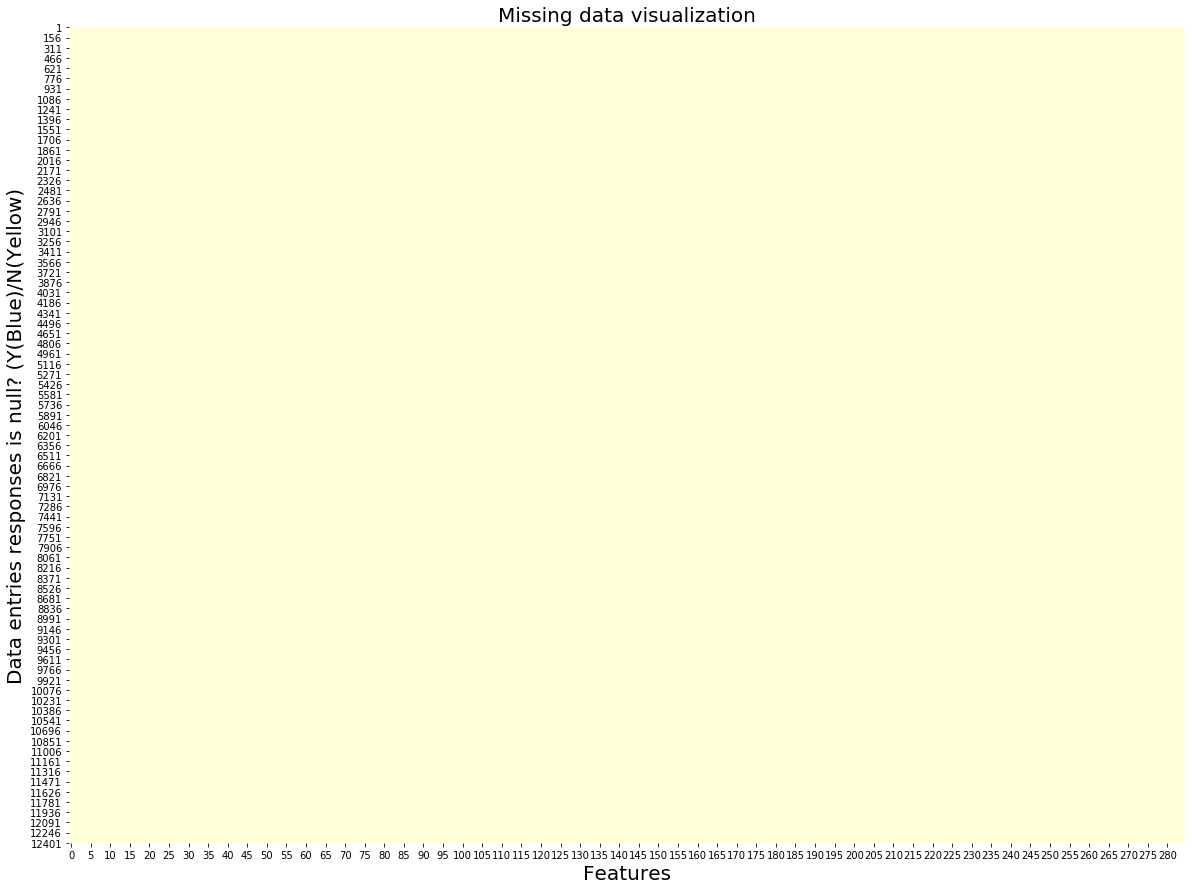

In [131]:
df = clean_data
column_name = df.columns
dict = {column_name[i] : i for i in range(0, len(column_name) )}
df = df.rename(columns=dict)

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df.isnull(), cmap="YlGnBu", xticklabels = 5,  cbar=False)

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data entries responses is null? (Y(Blue)/N(Yellow)', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

#### It is visible in the heat map that there is no missing value in the clean data set

### Visualizing missing data using msno.matrix

Text(0.5, 1.0, 'Missing data visualization')

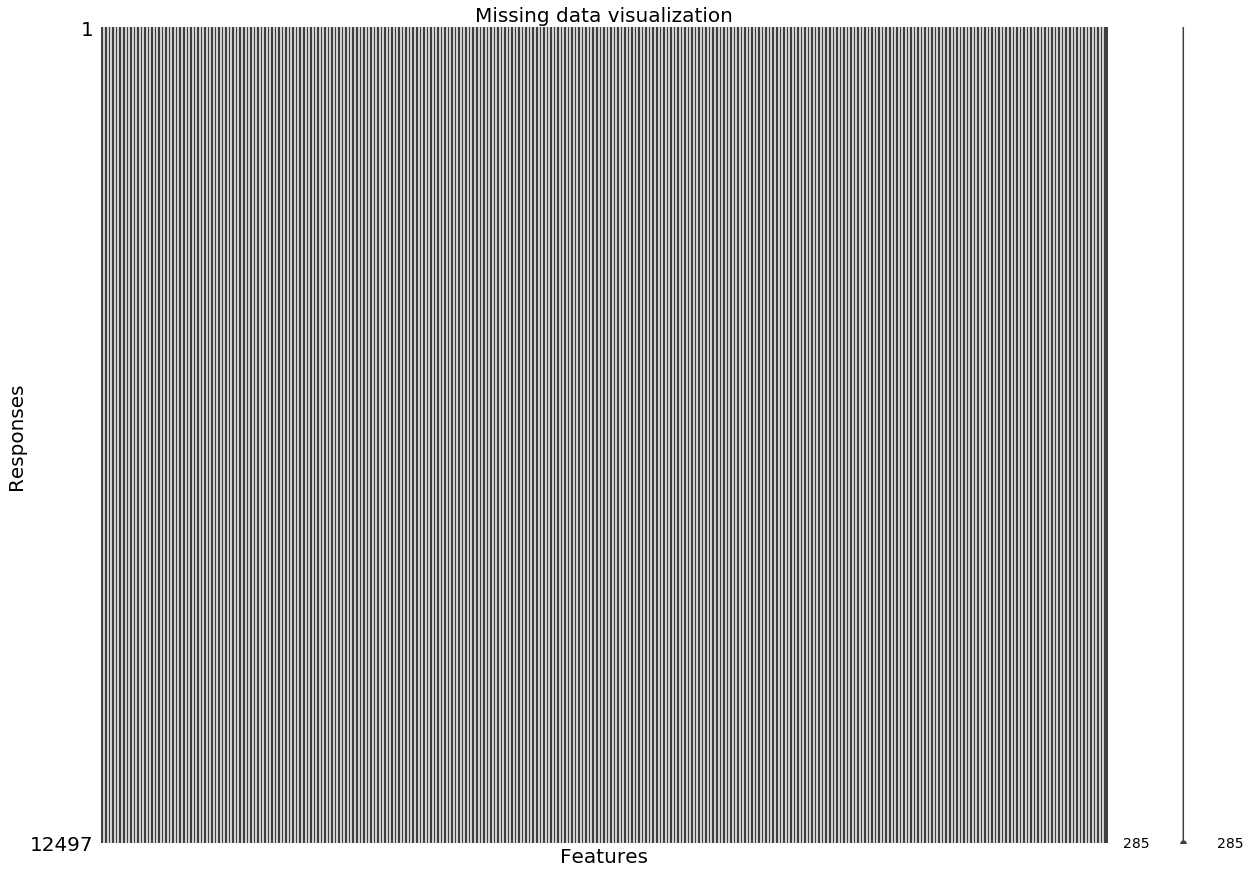

In [132]:
ax = miss_no.matrix(df,figsize=(20,15))

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Responses', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

#### None of the lines are broken lines which means there are no missing values. The verticle line on the right also shows that the row wise count of the missing values is 0.

# Q2 Exploratory data analysis and feature selection

### Feature selection have been done using 3 different techniques

## Technique 1 : Correlation Plot to visualize feature importance and hence to do the feature selection

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other. For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2). We can remove different features and measure the correlation in each case. These measured correlation can be used to decide whether to keep a feature or not.

Source: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [133]:
# Segregating Features and Target Variables in two different data sets 

other_text_list = [col for col in clean_data.columns if 'Q10' in col]
X = clean_data.drop(other_text_list, axis = 1)
Y = clean_data[other_text_list[0]]

In [134]:
# Writing data sets to Excel Sheets

X.to_excel("X.xlsx", sheet_name='Features')
Y.to_excel("Y.xlsx", sheet_name='Target Variable')

Number of Features Picked by the Correlation Matrix :  42


Text(158.09374999999997, 0.5, 'Potential Features')

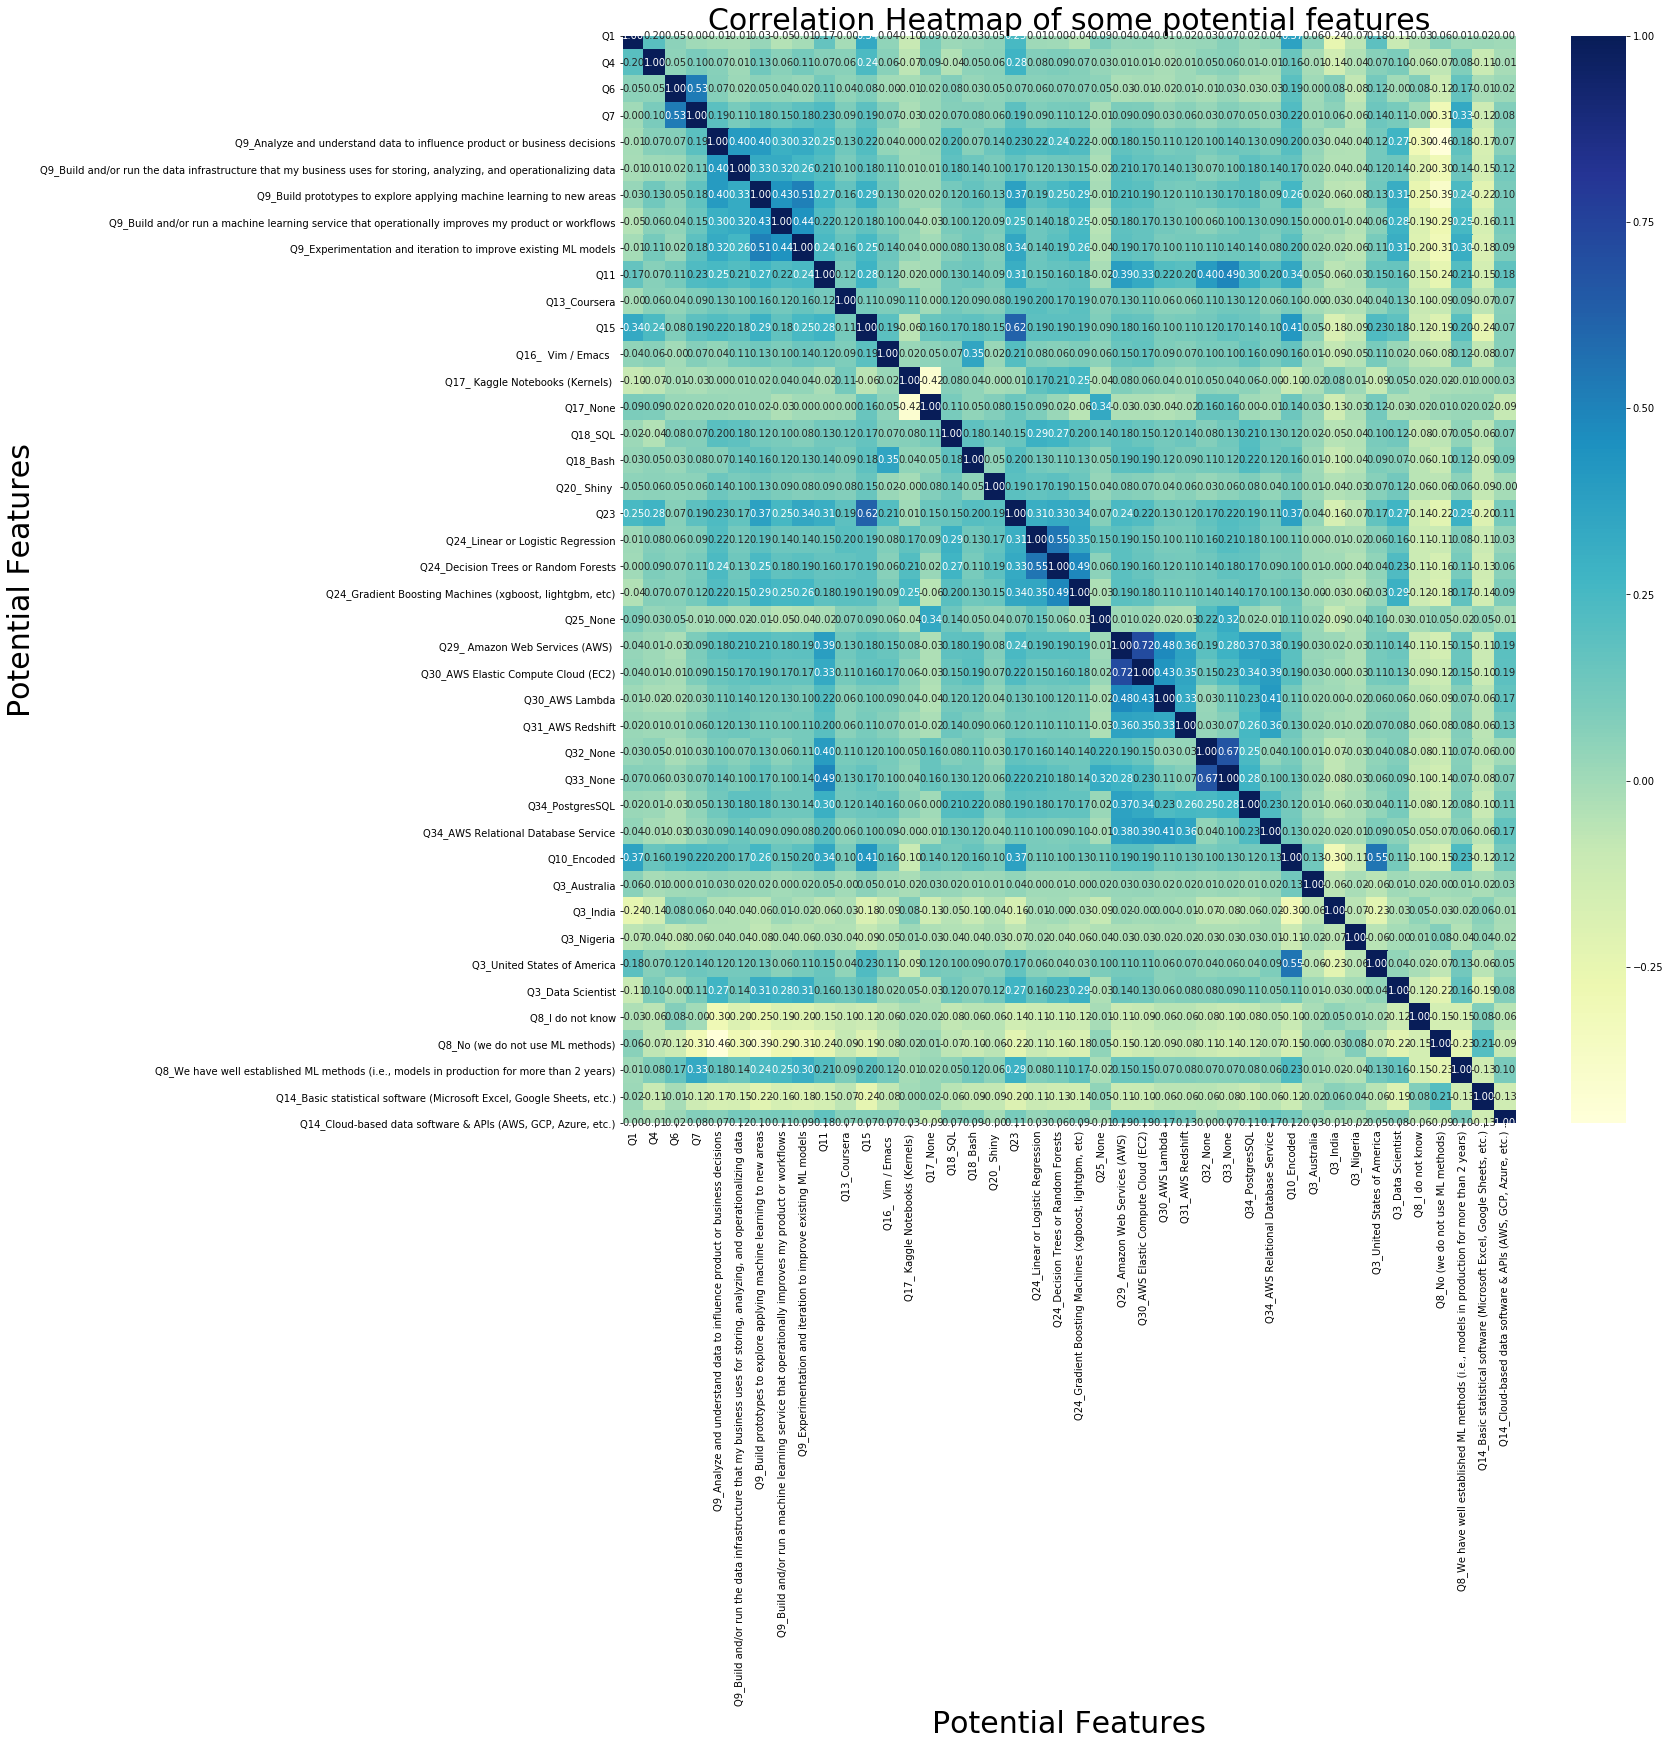

In [135]:
# Creating a Data set for Correlation Plot
clean_data2 = clean_data.drop('Q10_buckets', axis = 1)

# Getiing correlations Between features
corr_mat = clean_data2.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))

# Correlation with output variable
corr_target = abs(corr_mat['Q10_Encoded'])

# Selecting features which are highly correlated to the target variable
relevant_features = corr_target[corr_target > 0.10]
print('Number of Features Picked by the Correlation Matrix : ', len(relevant_features))

# Ploting heat map
g=sns.heatmap(clean_data2[pd.Series(relevant_features.index.values)].corr(),annot=True,fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of some potential features", fontsize=30)
g.set_xlabel("Potential Features",fontsize=30)
g.set_ylabel("Potential Features",fontsize=30)

In [136]:
# Creating a data set for the selected features

work_data = clean_data2[pd.Series(relevant_features.index.values)].corr()
work_data.head()

Q1        Q4  \
Q1                                                  1.000000  0.197542   
Q4                                                  0.197542  1.000000   
Q6                                                  0.054211  0.052761   
Q7                                                  0.001743  0.101637   
Q9_Analyze and understand data to influence pro... -0.006489  0.067588   

                                                          Q6        Q7  \
Q1                                                  0.054211  0.001743   
Q4                                                  0.052761  0.101637   
Q6                                                  1.000000  0.529543   
Q7                                                  0.529543  1.000000   
Q9_Analyze and understand data to influence pro...  0.073076  0.192336   

                                                    Q9_Analyze and understand data to influence product or business decisions  \
Q1                                                                                          -0.006489                           
Q4                                                                                           0.067588                           
Q6                                                                                           0.073076                           
Q7                                                                                           0.192336                           
Q9_Analyze and understand data to influence pro...                                           1.000000                           

                                                    Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data  \
Q1                                                                                          -0.010485                                                                     
Q4                                                                                           0.010892                                                                     
Q6                                                                                           0.017482                                                                     
Q7                                                                                           0.106384                                                                     
Q9_Analyze and understand data to influence pro...                                           0.402916                                                                     

                                                    Q9_Build prototypes to explore applying machine learning to new areas  \
Q1                                                                                           0.029957                       
Q4                                                                                           0.132449                       
Q6                                                                                           0.054535                       
Q7                                                                                           0.175997                       
Q9_Analyze and understand data to influence pro...                                           0.401569                       

                                                    Q9_Build and/or run a machine learning service that operationally improves my product or workflows  \
Q1                                                                                          -0.045853                                                    
Q4                                                                                           0.063487                                                    
Q6                                                                                           0.042023                                                    

In [137]:
# Removing features wich are highly correlated to each other

redundant_cols = []
for i in range(0,len(relevant_features)):
    df = pd.DataFrame(work_data.iloc[i,:])<0.7
    df.iloc[i,0] = True
    rows = list((df[(df.iloc[:,0] == False)].index).values)
    if len(rows) > 0:
        redundant_cols += rows
print("The following features are highly correlated to each other: \n" + str(redundant_cols) + "\n")

relevant_features.drop(redundant_cols,axis=0,inplace=True)
print('Number of Relevant Features left after delecting the highly correlated features : ', len(relevant_features))

The following features are highly correlated to each other: 
['Q30_AWS Elastic Compute Cloud (EC2)', 'Q29_ Amazon Web Services (AWS) ']

Number of Relevant Features left after delecting the highly correlated features :  40


### We will use the features, selected by this technique for fitting the model
### We are selecting the features which are related to the target variable by the factor of more than 0.1. We are neglecting the other features as they are not related much to the target variable and may lead to over fitting of the model. 

## Technique 2 : Random Forest

Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.

Source: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [138]:
randomforestselect = SelectFromModel(RandomForestClassifier(n_estimators = 100))
randomforestselect.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [139]:
randomf_selected_feat = X.columns[(randomforestselect.get_support())]
print('The number of selected features by random forest : ', len(randomf_selected_feat), "\n")
print("The selected fetures are as follows :" , "\n\n" , randomf_selected_feat)

The number of selected features by random forest :  103 

The selected fetures are as follows : 

 Index(['Q1', 'Q4', 'Q6', 'Q7',
       'Q9_Analyze and understand data to influence product or business decisions',
       'Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Q9_Build prototypes to explore applying machine learning to new areas',
       'Q9_Build and/or run a machine learning service that operationally improves my product or workflows',
       'Q9_Experimentation and iteration to improve existing ML models',
       'Q9_Do research that advances the state of the art of machine learning',
       ...
       'Q3_Research Scientist', 'Q3_Software Engineer', 'Q8_I do not know',
       'Q8_No (we do not use ML methods)',
       'Q8_We are exploring ML methods (and may one day put a model into production)',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
 

## Technique 3 : Lasso Regression

The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as -

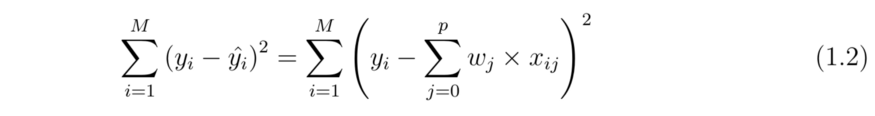


Just like Ridge regression cost function, for lambda =0, the equation above reduces to equation 1.2. The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Source: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [140]:
col_feat = X.columns

# Initializing the Lasso variable and fitting it with feature and target variable.
model_lasso = Lasso(alpha = 0.01, random_state=5).fit(X,Y)

# Using .coef_ attribute to give a correlation between the features
coef_b = pd.Series(model_lasso.coef_, index = X.columns)

# Deleting the features whose correlation value is 0
print("\nLasso picked " + str(sum(coef_b != 0)) + " variables and eliminated the other " +  str(sum(coef_b == 0)) + " variables\n")

# Initializing SelectFromModel to easily select the features from our Lasso Model
sfm_b = SelectFromModel(model_lasso)

# Training the selector
sfm_b.fit(X,Y)

# Printing the names of the most important features
print("The names of the selected important features are as follows : " + "\n")
for feature_list_index in sfm_b.get_support(indices=True):
    print(col_feat[feature_list_index])

# New feature data with selected features
feature_data_selected = X[X.columns[(sfm_b.get_support())]]


Lasso picked 104 variables and eliminated the other 179 variables

The names of the selected important features are as follows : 

Q1
Q4
Q6
Q7
Q9_Analyze and understand data to influence product or business decisions
Q9_Build prototypes to explore applying machine learning to new areas
Q9_Do research that advances the state of the art of machine learning
Q9_None of these activities are an important part of my role at work
Q11
Q13_Coursera
Q13_edX
Q13_DataCamp
Q13_Kaggle Courses (i.e. Kaggle Learn)
Q13_Fast.ai
Q13_Udemy
Q13_University Courses (resulting in a university degree)
Q13_Other
Q15
Q16_ RStudio 
Q16_ Atom 
Q16_ MATLAB 
Q16_ Visual Studio / Visual Studio Code 
Q16_  Spyder  
Q16_  Vim / Emacs  
Q16_  Notepad++  
Q16_  Sublime Text  
Q17_ Kaggle Notebooks (Kernels) 
Q17_ Google Colab 
Q17_None
Q18_R
Q18_C
Q18_Bash
Q18_MATLAB
Q20_ Matplotlib 
Q21_GPUs
Q21_None / I do not know
Q22
Q23
Q24_Gradient Boosting Machines (xgboost, lightgbm, etc)
Q24_Bayesian Approaches
Q24_Recurrent Neu

### Comparing the features selected by the three techniques

In [141]:
# Converting the selected features to sets

corr_set=set(relevant_features)
print("The number of selected features by the \"Correlation Plot\" Technique : " + str(len(corr_set)))
rand_for_set=set(randomf_selected_feat)
print("The number of selected features by the \"Random Forest\" Technique : " + str(len(rand_for_set)))
lasso_set=set(feature_data_selected)
print("The number of selected features by the \"Lasso Regression\" Technique : " + str(len(lasso_set)))

The number of selected features by the "Correlation Plot" Technique : 40
The number of selected features by the "Random Forest" Technique : 103
The number of selected features by the "Lasso Regression" Technique : 104


In [142]:
print("Number of common selected features by the \"Correlation Plot\" Technique and the \"Random Forest\" Technique : " + str(len(rand_for_set.intersection(corr_set))))
print("Number of common selected features by the \"Correlation Plot\" Technique and the \"Lasso Regression\" Technique : " + str(len(lasso_set.intersection(corr_set))))
print("Number of common selected features by the \"Lasso Regression\" Technique and the \"Random Forest\" Technique : " + str(len(rand_for_set.intersection(lasso_set))))

Number of common selected features by the "Correlation Plot" Technique and the "Random Forest" Technique : 0
Number of common selected features by the "Correlation Plot" Technique and the "Lasso Regression" Technique : 0
Number of common selected features by the "Lasso Regression" Technique and the "Random Forest" Technique : 67


#### These results can be used to find the best technique to select the features, for this data set ,after tunning the classification models for all three of them

### Creating the separate data sets for the features selected by different techniques and converting them to Excel Sheets

In [143]:
relevant_features = list(relevant_features.to_frame().index.values)
randomf_selected_feat = list(randomf_selected_feat.values)
feature_data_selected = list(feature_data_selected.columns)

# Creating the data sets
df_corr=clean_data[relevant_features]
df_rand=clean_data[randomf_selected_feat]
df_lasso=clean_data[feature_data_selected]

# Convering to Excel Sheets
df_corr.to_excel("df_corr.xlsx", sheet_name='Correlation Plot')
df_rand.to_excel("df_rand.xlsx", sheet_name='Random Forest')
df_lasso.to_excel("df_lasso.xlsx", sheet_name='Lasso Regression')

## Feature Engineering

#### Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

#### It is the process in which new features are created based on the existing features or basically clubbing/manipulating the existing features to get the new ones. Those new features then can be used to train the Classification Model.

#### Here the Feature Engineering have not been incorporated because of the lack of domain knowledge and also to look how model is behaving after getting trained on the existing featues.

## Dimensionality Reduction using PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set.

PCA is sensitive to the relative scaling of the original variables. Hence, we perform Standard Scaling first to prevent the sensitivity

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

#### As the number of features are large, Dimensionality Reduction has been used 

#### Dimensionality Reduction for the selected features from the Correlation Plot

In [144]:
# Dimensionality Reduction for the selected features from the Correlation Plot

pca = PCA(n_components=0.99,random_state=0)
pca_fit_corr = pd.DataFrame(pca.fit_transform(df_corr))
print(pca_fit_corr.shape)

(12497, 31)


Cumunlative explained variance is =  99.07163741998126 %


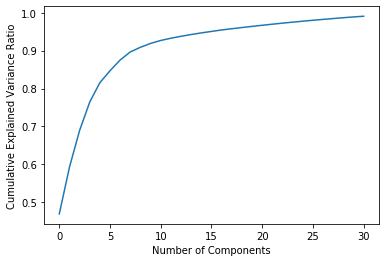

In [145]:
# plotting explained variance vs. number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

#### It is evident from the graph that as we increase the number of components, the cumulative explained variance always increases. Thus, accuracy increases as we increase number of components. Hence to get the maximum accuracy of our model, we choose 99% of components where we obtained 99.07% explained variance.

#### Dimensionality Reduction for the selected features from the Random Forest

In [146]:
# Dimensionality Reduction for the selected features from the Random Forest

pca = PCA(n_components=0.99,random_state=0)
pca_fit_rand = pd.DataFrame(pca.fit_transform(df_rand))
print(pca_fit_rand.shape)

(12497, 92)


Cumunlative explained variance is =  99.12867143331815 %


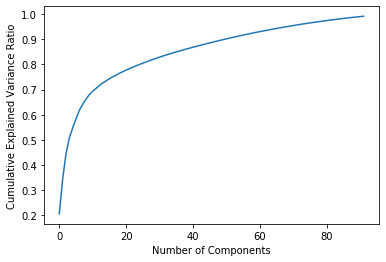

In [147]:
# plotting explained variance vs number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

#### It is evident from the graph that as we increase the number of components, the cumulative explained variance always increases. Thus, accuracy increases as we increase number of components. Hence to get the maximum accuracy of our model, we choose 99% of components where we obtained 99.04% explained variance.

#### Dimensionality Reduction for the selected features from the Lasso Regression

In [148]:
# Dimensionality Reduction for the selected features from the Lasso Regression

pca = PCA(n_components=0.99,random_state=0)
pca_fit_lasso = pd.DataFrame(pca.fit_transform(df_lasso))
print(pca_fit_lasso.shape)

(12497, 83)


Cumunlative explained variance is =  99.0305064411622 %


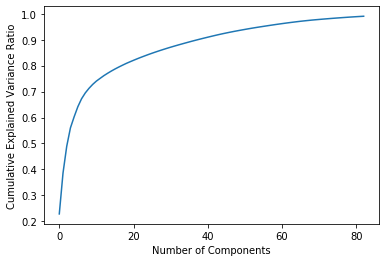

In [149]:
# plotting explained variance vs number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

#### It is evident from the graph that as we increase the number of components, the cumulative explained variance always increases. Thus, accuracy increases as we increase number of components. Hence to get the maximum accuracy of our model, we choose 99% of components where we obtained 99.03% explained variance.

# Q3 Model implementation

### Implementing the Logistic Regression Model on the features selected by the Correlation Plot Technique

In [150]:
# Splitting the data into training and testing data - 30% testing and 70% training 
# Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify

X_train_corr, X_test_corr, Y_train_corr, Y_test_corr = train_test_split(pca_fit_corr,Y,test_size=0.3, random_state=101, stratify=Y)

In [151]:
# Model Implementation

model = LogisticRegression(multi_class='ovr', C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train_corr, Y_train_corr)
train_output = model.predict(X_train_corr)
train_accuracy = accuracy_score(Y_train_corr, train_output)
print("The train accuracy achieved : ",(train_accuracy))

The train accuracy achieved :  0.5939179147136161


In [152]:
test_output = model.predict(X_test_corr)
test_accuracy = accuracy_score(Y_test_corr, test_output)
print("The test accuracy achieved : ",(test_accuracy))

The test accuracy achieved :  0.5714666666666667


### Implementing the Logistic Regression Model on the training data using 10-fold cross-validation

In [153]:
train_accuracy_list = []
test_accuracy_list = []
X = np.array(X_train_corr)
y = np.array(Y_train_corr)
kf = KFold(n_splits=10)
kf.get_n_splits(X)

num_fold=1
for train_index, test_index in kf.split(X):
     
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(multi_class='ovr', C=1.0, penalty='l2', solver='lbfgs')
    model.fit(X_train, y_train)
    train_output = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_output)
    train_accuracy_list.append(train_accuracy)
    test_output = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_output)
    test_accuracy_list.append(test_accuracy)
    print("\nTrain accuracy achieved at fold {} : {}".format(num_fold, train_accuracy))
    print("Test accuracy achieved at fold {} : {}".format(num_fold, test_accuracy))
    
    num_fold+=1


Train accuracy achieved at fold 1 : 0.5992123983739838
Test accuracy achieved at fold 1 : 0.568

Train accuracy achieved at fold 2 : 0.5976880081300813
Test accuracy achieved at fold 2 : 0.5428571428571428

Train accuracy achieved at fold 3 : 0.5957825203252033
Test accuracy achieved at fold 3 : 0.5714285714285714

Train accuracy achieved at fold 4 : 0.5960365853658537
Test accuracy achieved at fold 4 : 0.5725714285714286

Train accuracy achieved at fold 5 : 0.5983231707317073
Test accuracy achieved at fold 5 : 0.5554285714285714

Train accuracy achieved at fold 6 : 0.5961636178861789
Test accuracy achieved at fold 6 : 0.5485714285714286

Train accuracy achieved at fold 7 : 0.5979420731707317
Test accuracy achieved at fold 7 : 0.5554285714285714

Train accuracy achieved at fold 8 : 0.5929124857106567
Test accuracy achieved at fold 8 : 0.562929061784897

Train accuracy achieved at fold 9 : 0.5910072399339514
Test accuracy achieved at fold 9 : 0.5697940503432495

Train accuracy achieved

In [154]:
# Calculating the average and the variance of the achieved accuracies

avg_train_accuracy = np.mean(np.array(train_accuracy_list))
avg_test_accuracy = np.mean(np.array(test_accuracy_list))
var_train_accuracy = np.var(np.array(train_accuracy_list))
var_test_accuracy = np.var(np.array(test_accuracy_list))

print("The Average Train Accuracy achieved is : ", avg_train_accuracy)
print("The Average Test Accuracy achieved is : ", avg_test_accuracy)
print("\nThe Variance of Train Accuracy achieved is : ", var_train_accuracy)
print("The Variance of Test Accuracy achieved is : ", var_test_accuracy)

The Average Train Accuracy achieved is :  0.5961537044122187
The Average Test Accuracy achieved is :  0.561680287675711

The Variance of Train Accuracy achieved is :  5.6857107959128854e-06
The Variance of Test Accuracy achieved is :  9.911313559706969e-05


#### To find out how our model is performing with respect to bias-variance trade-off, we plot the learning curve

### Plotting the learning curve

Learning curves show the relationship between training set size and your chosen evaluation metric (e.g. RMSE, accuracy, etc.) on your training and validation sets. They can be an extremely useful tool when diagnosing your model performance, as they can tell you whether your model is suffering from bias or variance.

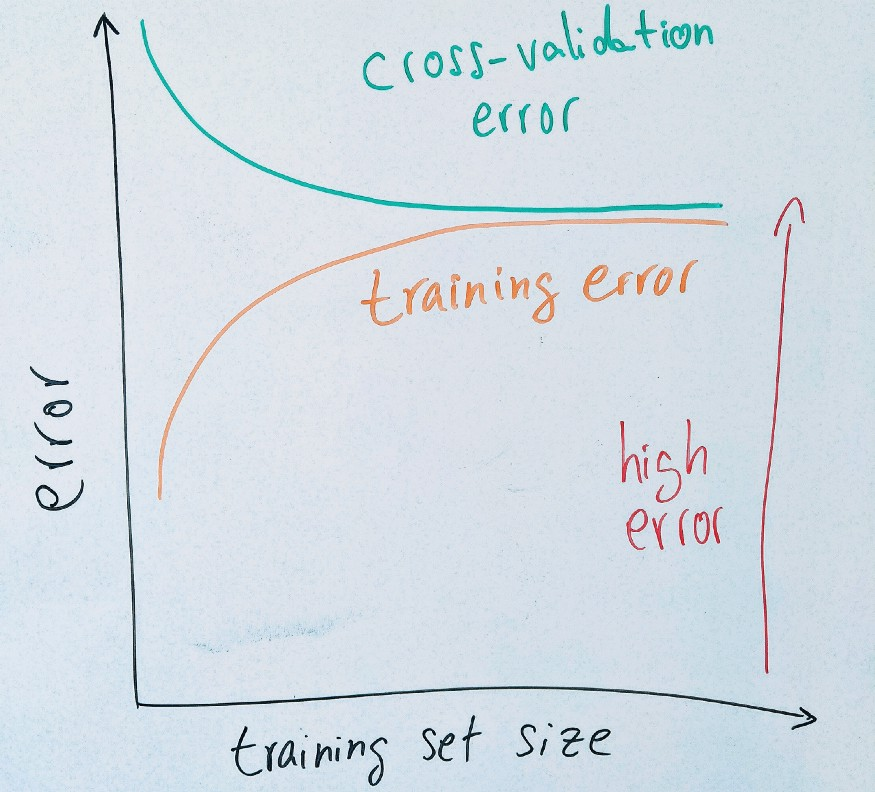

If your learning curves look like this, it means your model is suffering from high bias. Both the training and validation (or cross-validation) error is high and it doesn’t seem to improve with more training examples. The fact that your model is performing similarly bad for both the training and validation sets suggests that the model is underfitting the data and therefore has high bias.

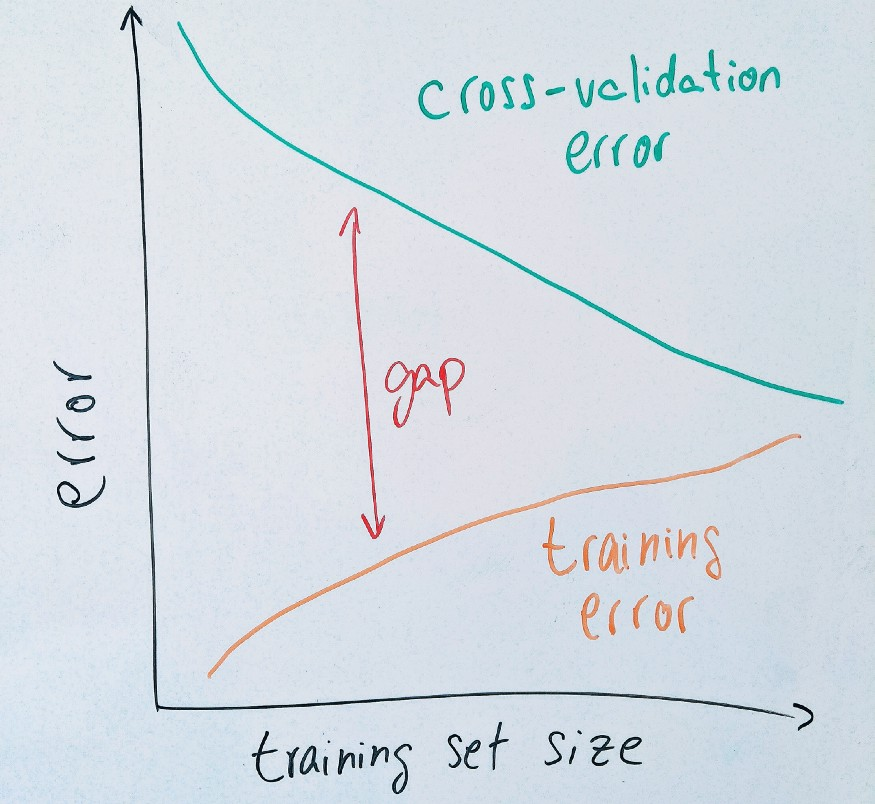

On the other hand, if your learning curves look like this, your model might have a high-variance problem. In this chart, the validation error is much higher than the training error, which suggests that you are overfitting the data.

Source: https://medium.com/@datalesdatales/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

In [155]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return plt

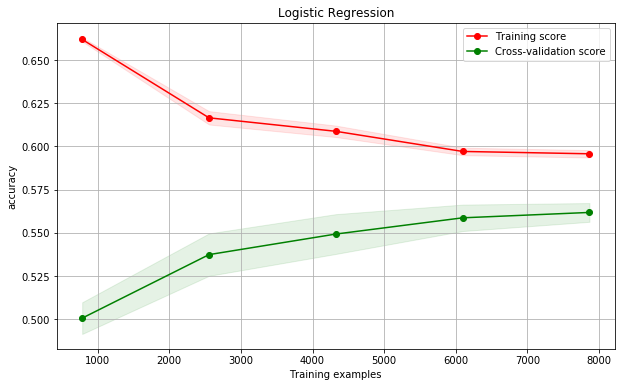

<module 'matplotlib.pyplot' from 'C:\\Users\\goela\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [156]:
plot_learning_curve(model,'Logistic Regression', X_train_corr, Y_train_corr, cv=10)

#### As our learning curve is having enough gap, it doesn't seem to be affected by either bias or variance in a high degree. However, the accuracy comes to about 60% only

High-Bias: Predicted data points are far from the target. Also, the model suggests more assumptions about the form of the target function
High Variance: Data points are spreaded and as a result far from the function. Suggests large changes to the estimate of the target function with changes to the training dataset.

High bias and low variance definition source: https://towardsdatascience.com/tradeoffs-how-to-aim-for-the-sweet-spot-c20b40d5e6b6

### The bias-variance trade-off

In supervised learning, we assume there’s a real relationship between feature(s) and target and estimate this unknown relationship with a model. Provided the assumption is true, there really is a model, which we’ll call , which describes perfectly the relationship between features and target.

In practice,  is almost always completely unknown, and we try to estimate it with a model  (notice the slight difference in notation between  and ). We use a certain training set and get a certain . If we use a different training set, we are very likely to get a different . As we keep changing training sets, we get different outputs for . The amount by which  varies as we change training sets is called variance.

If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.

The relationship between the training and validation error, and the gap can be summarized this way: validation error - training error  So the bigger the difference between the two errors, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low. High training MSE scores are also a quick way to detect low variance. If the variance of a learning algorithm is low, then the algorithm will come up with simplistic and similar models as we change the training sets. Because the models are overly simplified, they cannot even fit the training data well (they underfit the data). So we should expect high training MSEs. Hence, high training MSEs can be used as indicators of low variance.

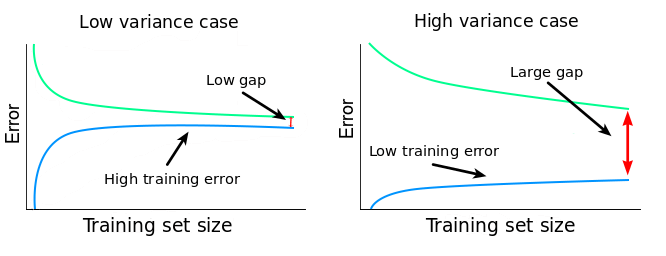

For classification tasks, the workflow is almost identical. The main difference is that we’ll have to choose another error metric – one that is suitable for evaluating the performance of a classifier. Unlike what we’ve seen so far, notice that the learning curve for the training error is above the one for the validation error. This is because the score used, accuracy, describes how good the model is. The higher the accuracy, the better. 

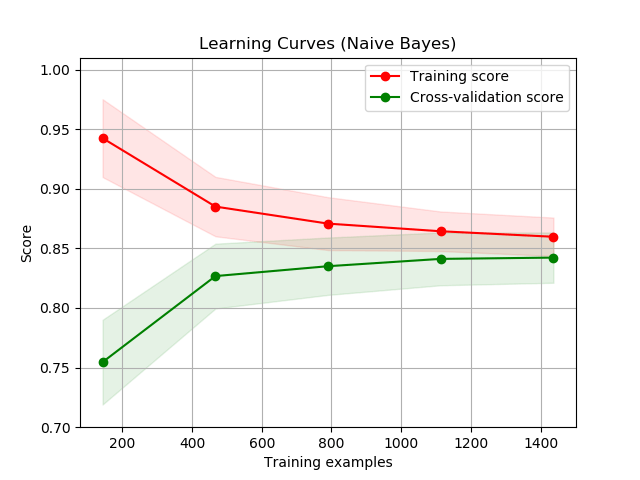

Source: https://www.dataquest.io/blog/learning-curves-machine-learning/

### Finding the salary class probabilities

In [157]:
prob_on_training_data=model.predict_proba(X_train_corr)
prediction_table=pd.DataFrame(prob_on_training_data, columns=model.classes_)
prediction_table.iloc[:,:]

0.0       1.0       2.0       3.0       4.0       5.0   \
0     7.898092e-20  0.082742  0.139386  0.118472  0.113724  0.183004   
1     4.955177e-37  0.013648  0.027341  0.056814  0.041194  0.112563   
2     1.639938e-15  0.107329  0.170605  0.118468  0.149451  0.172037   
3     6.193342e-01  0.191194  0.094807  0.029918  0.021229  0.020936   
4     6.409815e-01  0.152748  0.100028  0.043520  0.023129  0.011121   
...            ...       ...       ...       ...       ...       ...   
8742  3.229331e-32  0.024962  0.047743  0.051699  0.098205  0.165756   
8743  4.627429e-11  0.288694  0.327893  0.087072  0.102629  0.074523   
8744  2.441725e-28  0.018655  0.055306  0.092516  0.115126  0.156216   
8745  5.453637e-37  0.009214  0.022225  0.025410  0.044238  0.068349   
8746  2.930295e-02  0.201195  0.207613  0.115796  0.149215  0.130342   

          6.0       7.0       8.0       9.0       10.0      11.0      12.0  \
0     0.099277  0.105961  0.064155  0.053635  0.025784  0.012709  0.001136   
1     0.086556  0.062400  0.075577  0.090682  0.161885  0.163475  0.103175   
2     0.085637  0.079243  0.039413  0.029433  0.042566  0.004820  0.000978   
3     0.009846  0.004922  0.003382  0.002317  0.001983  0.000116  0.000015   
4     0.011701  0.008317  0.003585  0.002914  0.001740  0.000208  0.000008   
...        ...       ...       ...       ...       ...       ...       ...   
8742  0.105540  0.101608  0.046827  0.081992  0.222607  0.039358  0.013345   
8743  0.037260  0.038698  0.006606  0.008127  0.027467  0.000703  0.000324   
8744  0.209842  0.100062  0.051232  0.094944  0.080485  0.022539  0.002765   
8745  0.068457  0.103476  0.076408  0.120698  0.222444  0.090032  0.145191   
8746  0.060195  0.063916  0.015406  0.015689  0.009945  0.001332  0.000053   

              13.0          14.0  
0     1.493660e-05  1.104037e-21  
1     4.691389e-03  7.231080e-12  
2     1.880237e-05  1.715396e-24  
3     3.385583e-08  7.945332e-35  
4     5.058745e-09  1.882398e-34  
...            ...           ...  
8742  3.562031e-04  1.334713e-13  
8743  2.922402e-06  1.773351e-26  
8744  3.108966e-04  6.178607e-17  
8745  3.856734e-03  4.446183e-12  
8746  9.164512e-08  2.194966e-31  

[8747 rows x 15 columns]

In [158]:
salary_encode = {0.0:'$0-9999',
                 1.0:'10,000-19,999',
                 2.0:'20,000-29,999',
                 3.0:'30,000-39,999',
                 4.0:'40,000-49,999',
                 5.0:'50,000-59,999',
                 6.0:'60,000-69,999',
                 7.0:'70,000-79,999',
                 8.0:'80,000-89,999',
                 9.0:'90,000-99,999',
                 10.0:'100,000-124,999',
                 11.0:'125,000-149,999',
                 12.0:'150,000-199,999',
                 13.0:'200,000-249,999',
                 14.0:'>= $250,000'}

In [159]:
# Changing column names so as to show salary buckets

rediction_table = prediction_table.rename(columns=salary_encode)
rediction_table.head()

$0-9999  10,000-19,999  20,000-29,999  30,000-39,999  40,000-49,999  \
0  7.898092e-20       0.082742       0.139386       0.118472       0.113724   
1  4.955177e-37       0.013648       0.027341       0.056814       0.041194   
2  1.639938e-15       0.107329       0.170605       0.118468       0.149451   
3  6.193342e-01       0.191194       0.094807       0.029918       0.021229   
4  6.409815e-01       0.152748       0.100028       0.043520       0.023129   

   50,000-59,999  60,000-69,999  70,000-79,999  80,000-89,999  90,000-99,999  \
0       0.183004       0.099277       0.105961       0.064155       0.053635   
1       0.112563       0.086556       0.062400       0.075577       0.090682   
2       0.172037       0.085637       0.079243       0.039413       0.029433   
3       0.020936       0.009846       0.004922       0.003382       0.002317   
4       0.011121       0.011701       0.008317       0.003585       0.002914   

   100,000-124,999  125,000-149,999  150,000-199,999  200,000-249,999  \
0         0.025784         0.012709         0.001136     1.493660e-05   
1         0.161885         0.163475         0.103175     4.691389e-03   
2         0.042566         0.004820         0.000978     1.880237e-05   
3         0.001983         0.000116         0.000015     3.385583e-08   
4         0.001740         0.000208         0.000008     5.058745e-09   

    >= $250,000  
0  1.104037e-21  
1  7.231080e-12  
2  1.715396e-24  
3  7.945332e-35  
4  1.882398e-34

# Q4 Model tuning

### Grid searching of hyperparameters

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. using GridSearchCV

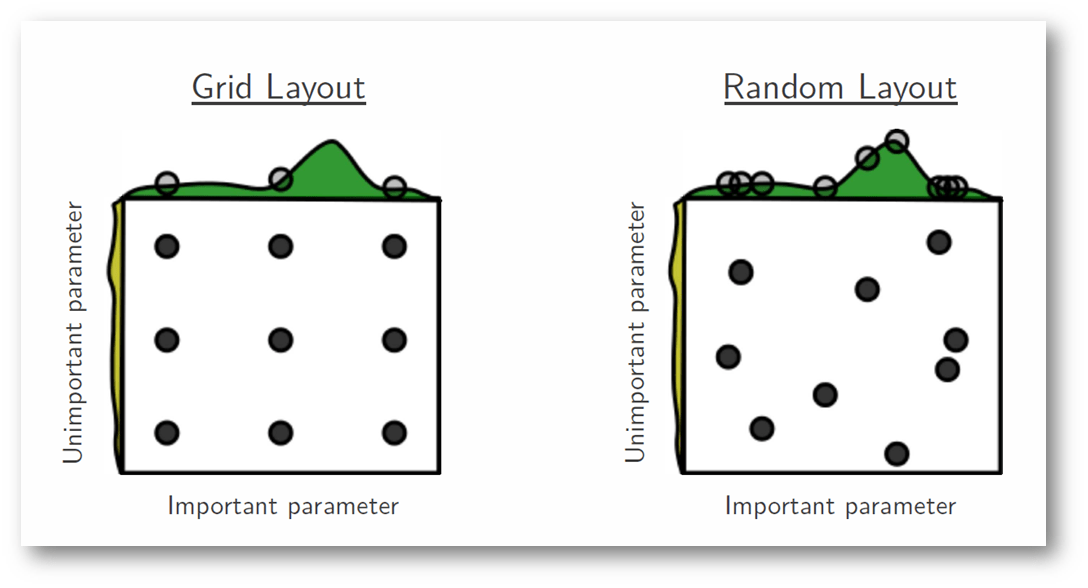

Source: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

### Pipeline

The Pipeline constructor from sklearn allows you to chain transformers and estimators together into a sequence that functions as one cohesive unit. For example, if your model involves feature selection, standardization, and then regression, those three steps, each as it's own class, could be encapsulated together via Pipeline

Source: https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c

### To check if the number of components that we have chosen in PCA were optimum, we run a Pipeline with GridSearchCV to check both PCA and Logistic Regression in tandem to each other

In [160]:
Pca=PCA()

Log_Reg=LogisticRegression(multi_class='ovr',max_iter=200,penalty='l2')

steps = [('PCA', Pca), ('Log_Reg', Log_Reg)]

pipeline = Pipeline(steps)

parameters = {'PCA__n_components': [0.9, 0.95, 0.99], 'Log_Reg__C' : [0.1,0.5,1,5,10,50,100] , 'Log_Reg__solver' : ['newton-cg','lbfgs','sag','saga']}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(X_train_corr, Y_train_corr)  

print('Best score and parameter combination = ')

print(CV.best_score_)
print(CV.best_params_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 12.6min finished


Best score and parameter combination = 
0.5725391562821539
{'Log_Reg__C': 0.5, 'Log_Reg__solver': 'newton-cg', 'PCA__n_components': 0.99}


#### The optimum C value is 0.5
#### The optimum Logistic Regression Solver is 'newton-cg'
#### It is evident from the result above that 99% explained variance is optimum.

#### As described earlier through explained variance graph, we find that the best fit for number of components is when we take 99% explained variance.

#### Now, we will tune hyper-parameters in Logistic Regression through manual gridsearch. We do it manually to plot the training and testing error curves against different values of C

In [161]:
C_list = [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]
solver_list = ['newton-cg','lbfgs','sag','saga']

train_accuracy_list = []
test_accuracy_list = []
X = np.array(X_train_corr)
y = np.array(Y_train_corr)
kf = KFold(n_splits=10)
kf.get_n_splits(X)

    
for C in C_list:
    for solver in solver_list:
        
        model = LogisticRegression(multi_class='ovr', C=C, penalty='l2', solver=solver)
        kfold_train = []
        kfold_test = []

        for train_index, test_index in kf.split(X):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)
            train_output = model.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_output)
            test_output = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, test_output)

            kfold_train.append(train_accuracy)
            kfold_test.append(test_accuracy)

        train_accuracy_list.append(np.mean(kfold_train))
        test_accuracy_list.append(np.mean(kfold_test))

In [162]:
# Creating a matrix for training and testing error for each set of hyper-parameter

# index = [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]
# columns = ['newton-cg','lbfgs','sag','saga']
testErr_loop=pd.DataFrame(np.array(test_accuracy_list).reshape(len(C_list),len(solver_list)),index = C_list, columns=solver_list)

trainErr_loop=pd.DataFrame(np.array(train_accuracy_list).reshape(len(C_list),len(solver_list)),index = C_list, columns=solver_list)
print("\nTrain Matrix\n", trainErr_loop,'\n\nTest Matrix\n',testErr_loop)


Train Matrix
           newton-cg     lbfgs       sag      saga
0.001      0.405993  0.405993  0.406006  0.406006
0.010      0.477421  0.477421  0.477446  0.476493
0.050      0.572133  0.572120  0.571180  0.566378
0.100      0.590844  0.590844  0.589866  0.584924
0.500      0.596281  0.596293  0.594985  0.591847
1.000      0.596154  0.596154  0.594756  0.591797
5.000      0.595938  0.595925  0.594452  0.591517
10.000     0.595823  0.595811  0.594324  0.591403
100.000    0.595811  0.595849  0.594236  0.591327
1000.000   0.595823  0.595874  0.594236  0.591339 

Test Matrix
           newton-cg     lbfgs       sag      saga
0.001      0.402310  0.402310  0.402310  0.402310
0.010      0.457757  0.457757  0.457757  0.457185
0.050      0.544418  0.544418  0.543274  0.537329
0.100      0.561681  0.561681  0.559852  0.553906
0.500      0.561680  0.561680  0.559051  0.555735
1.000      0.561680  0.561680  0.558822  0.555964
5.000      0.561795  0.561681  0.558822  0.555392
10.000     0.561795 

### Plotting the curves of Log-Loss Error

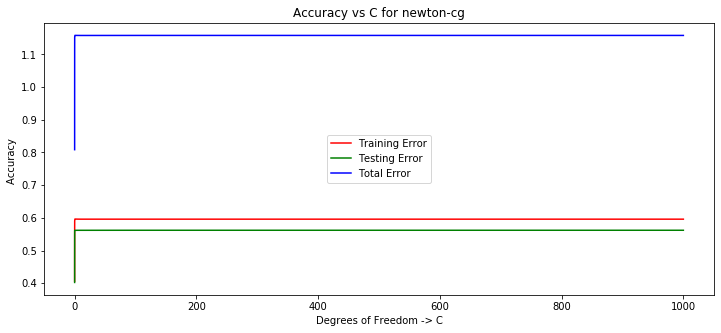

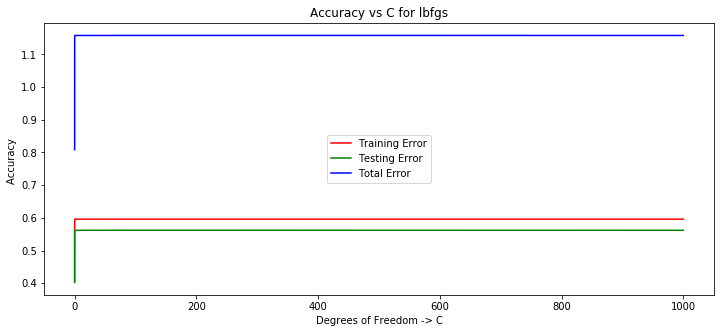

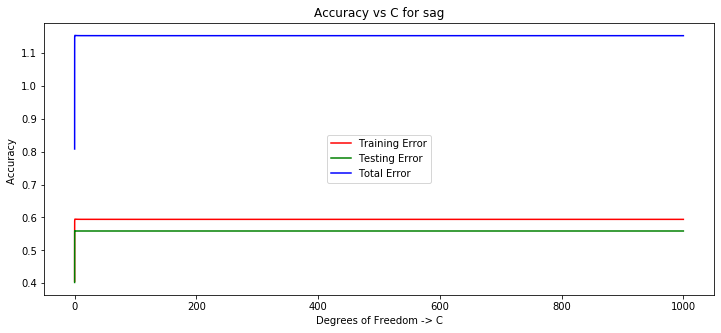

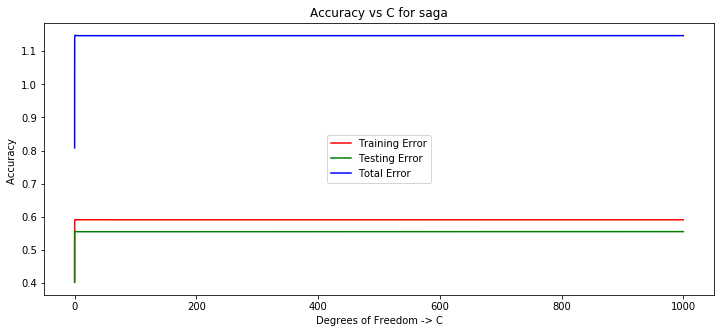

In [163]:
# Plotting the curve of Log-Loss Error (both training and testing) vs values of C for a particular solver type

# solver_type =['newton-cg','lbfgs','sag','saga']

for i in range(1,5):
    plt.figure(figsize=(12,5))
    plt.plot(trainErr_loop.iloc[:,i-1:i],'r',label='Training Error')
    plt.plot(testErr_loop.iloc[:,i-1:i],'g',label='Testing Error')
    plt.plot(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i], 'b', label='Total Error')

    test_loss_min = testErr_loop.iloc[:,i-1:i].min()
    train_test_loss_min=(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i]).min()

    deg_min = np.array(testErr_loop.iloc[:,i-1:i]).argmin()
    total_deg_min = np.array((trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i])).argmin()

    plt.title("Accuracy vs C for " + solver_list[i-1])
    plt.xlabel("Degrees of Freedom -> C")
    plt.ylabel("Accuracy ")
    plt.legend(loc=10)

### The Log-Loss error vs C values was plotted for each type of solver and it is evident that the accuracy is increasing

# Q5 Testing & Discussion

### Running the tuned model on the test data

In [164]:
model = LogisticRegression(multi_class='ovr', C=CV.best_params_['Log_Reg__C'], penalty='l2', solver=CV.best_params_['Log_Reg__solver'])
model.fit(X_train_corr, Y_train_corr)
train_output = model.predict(X_train_corr)
train_accuracy = accuracy_score(Y_train_corr, train_output)
print("Train accuracy of the tuned model",(train_accuracy))

test_output = model.predict(X_test_corr)
test_accuracy = accuracy_score(Y_test_corr, test_output)
print("Test accuracy of the tuned model",(test_accuracy))

Train accuracy of the tuned model 0.5938035898022179
Test accuracy of the tuned model 0.5714666666666667


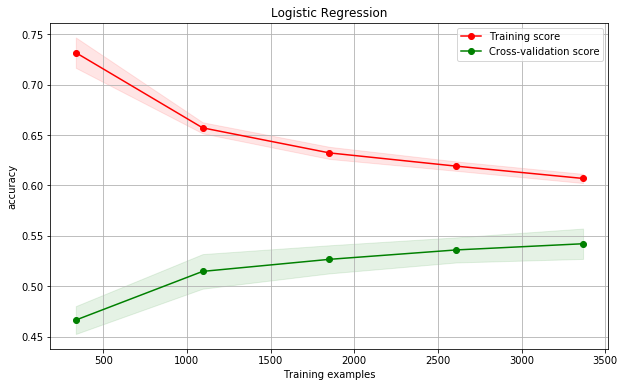

<module 'matplotlib.pyplot' from 'C:\\Users\\goela\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [165]:
## Running on testing dataset

plot_learning_curve(model,'Logistic Regression', X_test_corr, Y_test_corr, cv=10)

#### As our learning curve is having enough gap, it doesn't seem to be affected by either bias or variance in a high degree. This also shows that our model is not overfit. Due to low accuracy, it could be underfit though. However, the accuracyof the tuned model increased for the test data.

## Conclusions 

### 1. Preliminary Accuracy : 56.17%. Tuned Accuracy : 57.15%
### 2. The overall fit is not so great as we obtain accuracy of about 60%. However, our model is not overfit and we were able to achieve a balance between bias and variance
### 3. The Log-Loss error vs C values was plotted for each type of solver for showing training and testing error. And it is visible that the accuracy is increasing
### 4. The accuracy can be increased by further grouping the salary brackets. Also, other features selected from other two techniques can be applied to check the affect on accuracy and tuning the respective hyper-parameters